In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Set Random Seed for all
np.random.seed(42)

In [383]:
# Data paths
active_companies_paths = 'Datasets/Active_companies.csv'
bharatnet_path = 'Datasets/BharatnetServiceReadyGPs.csv'
DHIS_path = 'Datasets/DHIS.csv'
IGNDPS_path = 'Datasets/IGNDPS.csv'
IGNOAPS_path = 'Datasets/IGNOAPS.csv'
IGNWPS_path = 'Datasets/IGNWPS.csv'
PMGSY_path = 'Datasets/PMGSY.csv'
TB_Lab_path = 'Datasets/TB_Laboratory_Infrastructure.csv'

In [384]:
# Read Data
active_companies = pd.read_csv(active_companies_paths)
bharatnet = pd.read_csv(bharatnet_path)
DHIS = pd.read_csv(DHIS_path)
IGNDPS = pd.read_csv(IGNDPS_path)
IGNOAPS = pd.read_csv(IGNOAPS_path)
IGNWPS = pd.read_csv(IGNWPS_path)
PMGSY = pd.read_csv(PMGSY_path)
TB_Lab = pd.read_csv(TB_Lab_path)

# Selecting subset from each dataset

## Active companies

In [385]:
active_companies

,STATES/UT,No. of Companies - Public,AuthorizedCapital_Public (In Crores),No. of Companies - Private,AuthorizedCapital_Private (In Crores),No. of Companies - Total,Authorized Capital - Total (In Crores)
0,Andaman and Nicobar Islands,2,2.00,1,50.00,3,52.00
1,Andhra Pradesh,51,15770.75,36,1135.99,87,16906.74
2,Arunachal Pradesh,6,10.77,5,23.20,11,33.97
3,Assam,29,17149.85,34,938.00,63,18087.85
4,Bihar,66,78370.30,14,281.82,80,78652.12
5,Chandigarh,17,1032.21,18,1556.09,35,2588.30
6,Chhattisgarh,32,25215.20,7,1595.30,39,26810.50
7,Dadar Nagar Haveli,3,510.05,0,0.00,3,510.05
8,Daman and Diu,1,50.00,1,0.25,2,50.25
9,Delhi,217,446071.87,41,10451.92,258,456523.79


In [386]:
active_companies.columns

Index(['STATES/UT', 'No. of Companies - Public',
       'AuthorizedCapital_Public (In Crores)', 'No. of Companies - Private',
       'AuthorizedCapital_Private  (In Crores)', 'No. of Companies - Total',
       'Authorized Capital - Total  (In Crores)'],
      dtype='object')

In [387]:
# Select all columns other than [No. of Companies - Total, Authorized Capital - Total (In Crores)] into the subset
# Do not include the last row in the active_companies_subset
active_companies_subset = active_companies.iloc[:-1, :-2]
active_companies_subset

,STATES/UT,No. of Companies - Public,AuthorizedCapital_Public (In Crores),No. of Companies - Private,AuthorizedCapital_Private (In Crores)
0,Andaman and Nicobar Islands,2,2.00,1,50.00
1,Andhra Pradesh,51,15770.75,36,1135.99
2,Arunachal Pradesh,6,10.77,5,23.20
3,Assam,29,17149.85,34,938.00
4,Bihar,66,78370.30,14,281.82
5,Chandigarh,17,1032.21,18,1556.09
6,Chhattisgarh,32,25215.20,7,1595.30
7,Dadar Nagar Haveli,3,510.05,0,0.00
8,Daman and Diu,1,50.00,1,0.25
9,Delhi,217,446071.87,41,10451.92


In [388]:
3 # Check for any null / Nan values
active_companies_subset.isnull().sum()

STATES/UT                                 0
No. of Companies - Public                 0
AuthorizedCapital_Public (In Crores)      0
No. of Companies - Private                0
AuthorizedCapital_Private  (In Crores)    0
dtype: int64

In [389]:
# Rename the column 'STATES/UT' to 'state_name'
active_companies_subset.rename(columns={'STATES/UT': 'state_name'}, inplace=True)

# Convert the state_name column to upper case
active_companies_subset['state_name'] = active_companies_subset['state_name'].str.upper()

# Rename the 'ANDAMAN AND NICOBAR ISLANDS' in the state_name column to 'ANDAMAN AND NICOBAR'
active_companies_subset['state_name'] = active_companies_subset['state_name'].str.replace('ANDAMAN AND NICOBAR ISLANDS', 'ANDAMAN AND NICOBAR')

# Combine 'DAMAN AND DIU' & 'DADAR NAGAR HAVELI' into 'THE DADRA & NAGAR HAVELI AND DAMAN AND DIU'
active_companies_subset['state_name'] = active_companies_subset['state_name'].str.replace('DAMAN AND DIU', 'THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU')
active_companies_subset['state_name'] = active_companies_subset['state_name'].str.replace('DADAR NAGAR HAVELI', 'THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU')

# Convert 'ORISSA' to 'ODISHA'
active_companies_subset['state_name'] = active_companies_subset['state_name'].str.replace('ORISSA', 'ODISHA')

# Convert 'PONDICHERRY' to 'PUDUCHERRY'
active_companies_subset['state_name'] = active_companies_subset['state_name'].str.replace('PONDICHERRY', 'PUDUCHERRY')

# Combine any two or more rows with the same state_names into one row with the combined state_names)
active_companies_subset = active_companies_subset.groupby('state_name').sum().reset_index()

active_companies_subset

,state_name,No. of Companies - Public,AuthorizedCapital_Public (In Crores),No. of Companies - Private,AuthorizedCapital_Private (In Crores)
0,ANDAMAN AND NICOBAR,2,2.00,1,50.00
1,ANDHRA PRADESH,51,15770.75,36,1135.99
2,ARUNACHAL PRADESH,6,10.77,5,23.20
3,ASSAM,29,17149.85,34,938.00
4,BIHAR,66,78370.30,14,281.82
5,CHANDIGARH,17,1032.21,18,1556.09
6,CHHATTISGARH,32,25215.20,7,1595.30
7,DELHI,217,446071.87,41,10451.92
8,GOA,17,492.25,4,10.76
9,GUJARAT,87,161751.93,16,173.23


## Bharatnet

In [390]:
bharatnet

,State,District,Total Gram Panchayats,Service Ready Gram Panchayats,Unnamed: 4
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,8,7,NaN
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,37,37,NaN
2,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,30,30,NaN
3,ANDHRA PRADESH,ANANTAPUR,1044,996,NaN
4,ANDHRA PRADESH,CHITTOOR,1412,1193,NaN
...,...,...,...,...,...
711,WEST BENGAL,NADIA,185,185,NaN
712,WEST BENGAL,PASCHIM BARDHAMAN,62,56,NaN
713,WEST BENGAL,PURBA BARDHAMAN,215,146,NaN
714,WEST BENGAL,PURULIA,170,170,NaN


In [391]:
# Select all data except the last column and the last row
bharatnet_subset = bharatnet.iloc[:-1, :-1]
bharatnet_subset

,State,District,Total Gram Panchayats,Service Ready Gram Panchayats
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,8,7
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,37,37
2,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,30,30
3,ANDHRA PRADESH,ANANTAPUR,1044,996
4,ANDHRA PRADESH,CHITTOOR,1412,1193
...,...,...,...,...
710,WEST BENGAL,MURSHIDABAD,250,250
711,WEST BENGAL,NADIA,185,185
712,WEST BENGAL,PASCHIM BARDHAMAN,62,56
713,WEST BENGAL,PURBA BARDHAMAN,215,146


In [392]:
# Check for any Nan or null values
bharatnet_subset.isnull().sum()

State                            0
District                         0
Total Gram Panchayats            0
Service Ready Gram Panchayats    0
dtype: int64

In [393]:
# Check for the number of unique values in the 'District' column
bharatnet_subset['District'].nunique()

710

In [394]:
# Print the rows with duplicate distinct names
bharatnet_subset[bharatnet_subset.duplicated('District')]

,State,District,Total Gram Panchayats,Service Ready Gram Panchayats
197,HIMACHAL PRADESH,BILASPUR,151,0
355,MAHARASHTRA,AURANGABAD,866,716
611,UTTAR PRADESH EAST,BALRAMPUR,801,151
624,UTTAR PRADESH EAST,HAMIRPUR,330,301
641,UTTAR PRADESH EAST,PRATAPGARH,1241,1145


In [395]:
bharatnet_subset.columns

Index(['State ', 'District', 'Total Gram Panchayats',
       'Service Ready Gram Panchayats'],
      dtype='object')

In [396]:
# Rename the column from 'State' to 'state_name' and 'District' to 'district_name'
bharatnet_subset.rename(columns={'State ': 'state_name', 'District': 'district_name'}, inplace=True)

# Combine the columns 'Total Gram Panchayats' and 'Service Ready Gram Panchayats' into a new column 'Percentage_Service_Ready_Gram_Panchayats'

bharatnet_subset['Percentage_Service_Ready_Gram_Panchayats'] = (bharatnet_subset['Service Ready Gram Panchayats'] / bharatnet_subset['Total Gram Panchayats']) * 100

bharatnet_subset

,state_name,district_name,Total Gram Panchayats,Service Ready Gram Panchayats,Percentage_Service_Ready_Gram_Panchayats
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,8,7,87.500000
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,37,37,100.000000
2,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,30,30,100.000000
3,ANDHRA PRADESH,ANANTAPUR,1044,996,95.402299
4,ANDHRA PRADESH,CHITTOOR,1412,1193,84.490085
...,...,...,...,...,...
710,WEST BENGAL,MURSHIDABAD,250,250,100.000000
711,WEST BENGAL,NADIA,185,185,100.000000
712,WEST BENGAL,PASCHIM BARDHAMAN,62,56,90.322581
713,WEST BENGAL,PURBA BARDHAMAN,215,146,67.906977


In [397]:
# Drop the columns 'Total Gram Panchayats' and 'Service Ready Gram Panchayats'
bharatnet_subset.drop(columns=['Total Gram Panchayats', 'Service Ready Gram Panchayats'], inplace=True)
bharatnet_subset

,state_name,district_name,Percentage_Service_Ready_Gram_Panchayats
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,87.500000
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,100.000000
2,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,100.000000
3,ANDHRA PRADESH,ANANTAPUR,95.402299
4,ANDHRA PRADESH,CHITTOOR,84.490085
...,...,...,...
710,WEST BENGAL,MURSHIDABAD,100.000000
711,WEST BENGAL,NADIA,100.000000
712,WEST BENGAL,PASCHIM BARDHAMAN,90.322581
713,WEST BENGAL,PURBA BARDHAMAN,67.906977


In [398]:
# Rename 'ANDAMAN AND NICOBAR ISLANDS' in 'state_name' to 'ANDAMAN AND NICOBAR'
# Rename 'UTTAR PRADESH EAST' and 'UTTAR PRADESH WEST' in 'state_name' to 'UTTAR PRADESH'
bharatnet_subset['state_name'] = bharatnet_subset['state_name'].replace('ANDAMAN AND NICOBAR ISLANDS', 'ANDAMAN AND NICOBAR')
bharatnet_subset['state_name'] = bharatnet_subset['state_name'].replace('UTTAR PRADESH EAST', 'UTTAR PRADESH')
bharatnet_subset['state_name'] = bharatnet_subset['state_name'].replace('UTTAR PRADESH WEST', 'UTTAR PRADESH')

bharatnet_subset

,state_name,district_name,Percentage_Service_Ready_Gram_Panchayats
0,ANDAMAN AND NICOBAR,NICOBARS,87.500000
1,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,100.000000
2,ANDAMAN AND NICOBAR,SOUTH ANDAMANS,100.000000
3,ANDHRA PRADESH,ANANTAPUR,95.402299
4,ANDHRA PRADESH,CHITTOOR,84.490085
...,...,...,...
710,WEST BENGAL,MURSHIDABAD,100.000000
711,WEST BENGAL,NADIA,100.000000
712,WEST BENGAL,PASCHIM BARDHAMAN,90.322581
713,WEST BENGAL,PURBA BARDHAMAN,67.906977


In [399]:
# Replace 'S.A.S Nagar' in 'district_name' with 'SAS NAGAR'
# Replace '24 PARAGANAS SOUTH' in 'district_name' with '24 PARGANAS SOUTH'
# Replace '24 PARAGANAS NORTH' in 'district_name' with '24 PARGANAS NORTH'
# Replace 'MARIGAON' in 'district_name' with 'MORIGAON'
# Replace 'SOUTH SALMARA MANCACHAR' in 'district_name' with 'SOUTH SALMARA-MANKACHAR'
# Replace 'AURANGABAD' in 'district_name' with 'AURANAGABAD'

bharatnet_subset['district_name'] = bharatnet_subset['district_name'].replace('S.A.S Nagar', 'SAS NAGAR')
bharatnet_subset['district_name'] = bharatnet_subset['district_name'].replace('24 PARAGANAS SOUTH', '24 PARGANAS SOUTH')
bharatnet_subset['district_name'] = bharatnet_subset['district_name'].replace('24 PARAGANAS NORTH', '24 PARGANAS NORTH')
bharatnet_subset['district_name'] = bharatnet_subset['district_name'].replace('MARIGAON', 'MORIGAON')
bharatnet_subset['district_name'] = bharatnet_subset['district_name'].replace('SOUTH SALMARA MANCACHAR', 'SOUTH SALMARA-MANKACHAR')
bharatnet_subset['district_name'] = bharatnet_subset['district_name'].replace('AURANGABAD', 'AURANAGABAD')

bharatnet_subset

,state_name,district_name,Percentage_Service_Ready_Gram_Panchayats
0,ANDAMAN AND NICOBAR,NICOBARS,87.500000
1,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,100.000000
2,ANDAMAN AND NICOBAR,SOUTH ANDAMANS,100.000000
3,ANDHRA PRADESH,ANANTAPUR,95.402299
4,ANDHRA PRADESH,CHITTOOR,84.490085
...,...,...,...
710,WEST BENGAL,MURSHIDABAD,100.000000
711,WEST BENGAL,NADIA,100.000000
712,WEST BENGAL,PASCHIM BARDHAMAN,90.322581
713,WEST BENGAL,PURBA BARDHAMAN,67.906977


## DHIS

In [400]:
DHIS

,Sl. No.,State/UT,2022-23,2023-24
0,1,Andhra Pradesh,0.00,4.68
1,2,Assam,0.00,0.11
2,3,Bihar,0.00,0.58
3,4,Chandigarh,0.00,0.01
4,5,Chhattisgarh,0.00,0.40
5,6,Delhi,0.00,0.94
6,7,Gujarat,0.00,0.02
7,8,Haryana,0.00,0.32
8,9,Jammu and Kashmir,0.00,2.87
9,10,Jharkhand,0.00,0.04


In [401]:
# Select all rows except the last row
# Select last and the third last columns    
DHIS_subset = DHIS.iloc[:-1, [-3, -1]]
DHIS_subset

,State/UT,2023-24
0,Andhra Pradesh,4.68
1,Assam,0.11
2,Bihar,0.58
3,Chandigarh,0.01
4,Chhattisgarh,0.40
5,Delhi,0.94
6,Gujarat,0.02
7,Haryana,0.32
8,Jammu and Kashmir,2.87
9,Jharkhand,0.04


In [402]:
# Check for any null/ nan values
DHIS_subset.isnull().sum()

State/UT    0
2023-24     0
dtype: int64

In [403]:
# Replace column name 'State/UT' with 'state_name'
DHIS_subset.rename(columns={'State/UT': 'state_name'}, inplace=True)

# Update all the state names to Upper case
DHIS_subset['state_name'] = DHIS_subset['state_name'].str.upper()
DHIS_subset

,state_name,2023-24
0,ANDHRA PRADESH,4.68
1,ASSAM,0.11
2,BIHAR,0.58
3,CHANDIGARH,0.01
4,CHHATTISGARH,0.40
5,DELHI,0.94
6,GUJARAT,0.02
7,HARYANA,0.32
8,JAMMU AND KASHMIR,2.87
9,JHARKHAND,0.04


In [404]:
# Rename column '2023-24' to 'Funds_Released_DHBS'
DHIS_subset.rename(columns={'2023-24': 'Funds_Released_DHBS'}, inplace=True)
DHIS_subset

,state_name,Funds_Released_DHBS
0,ANDHRA PRADESH,4.68
1,ASSAM,0.11
2,BIHAR,0.58
3,CHANDIGARH,0.01
4,CHHATTISGARH,0.40
5,DELHI,0.94
6,GUJARAT,0.02
7,HARYANA,0.32
8,JAMMU AND KASHMIR,2.87
9,JHARKHAND,0.04


In [405]:
# datatype of 'Funds_Released_DHBS' column
DHIS_subset['Funds_Released_DHBS'].dtype

dtype('float64')

## IGNDPS

In [406]:
IGNDPS

,fin_year,mnth,lgd_state_code,state_name,lgd_district_code,district_name,scheme_code,total_beneficiaries,total_sc,total_st,total_gen,total_obc,total_aadhar,total_mobileno,lastUpdated
0,2024-2025,6,1,JAMMU AND KASHMIR,12,RAJAURI,IGNDPS,72,3,5,64,0,69,2,2024-07-29
1,2024-2025,6,1,JAMMU AND KASHMIR,13,SRINAGAR,IGNDPS,110,0,0,110,0,99,71,2024-07-29
2,2024-2025,6,1,JAMMU AND KASHMIR,14,UDHAMPUR,IGNDPS,19,3,1,14,1,17,4,2024-07-29
3,2024-2025,6,1,JAMMU AND KASHMIR,4,DODA,IGNDPS,224,18,12,194,0,224,48,2024-07-29
4,2024-2025,6,1,JAMMU AND KASHMIR,5,JAMMU,IGNDPS,14,2,1,10,1,14,1,2024-07-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12862,2024-2025,9,9,UTTAR PRADESH,164,MAHARAJGANJ,IGNDPS,3203,437,5,681,2080,1055,1911,2024-10-14
12863,2024-2025,9,9,UTTAR PRADESH,169,MEERUT,IGNDPS,973,227,0,445,301,589,680,2024-10-14
12864,2024-2025,9,9,UTTAR PRADESH,171,MORADABAD,IGNDPS,416,77,1,198,140,240,256,2024-10-14
12865,2024-2025,9,9,UTTAR PRADESH,172,MUZAFFARNAGAR,IGNDPS,1996,395,0,699,902,1369,1514,2024-10-14


In [407]:
IGNDPS.columns

Index(['fin_year', 'mnth', 'lgd_state_code', 'state_name', 'lgd_district_code',
       'district_name', 'scheme_code', 'total_beneficiaries', 'total_sc',
       'total_st', 'total_gen', 'total_obc', 'total_aadhar', 'total_mobileno',
       'lastUpdated'],
      dtype='object')

In [408]:
# Select the columns ['state_name', 'district_name','total_beneficiaries']
# Select all rows
IGNDPS_subset = IGNDPS[['state_name', 'district_name','total_beneficiaries']]
IGNDPS_subset

,state_name,district_name,total_beneficiaries
0,JAMMU AND KASHMIR,RAJAURI,72
1,JAMMU AND KASHMIR,SRINAGAR,110
2,JAMMU AND KASHMIR,UDHAMPUR,19
3,JAMMU AND KASHMIR,DODA,224
4,JAMMU AND KASHMIR,JAMMU,14
...,...,...,...
12862,UTTAR PRADESH,MAHARAJGANJ,3203
12863,UTTAR PRADESH,MEERUT,973
12864,UTTAR PRADESH,MORADABAD,416
12865,UTTAR PRADESH,MUZAFFARNAGAR,1996


In [409]:
# Check for null values in the subset
IGNDPS_subset.isnull().sum()

state_name             0
district_name          0
total_beneficiaries    0
dtype: int64

In [410]:
# Are all the district names in the subset unique?
IGNDPS_subset['district_name'].nunique()

713

In [411]:
# Combine the rows with the same distinct and state names by adding their 'total_beneficiaries' values
IGNDPS_subset = IGNDPS_subset.groupby(['state_name', 'district_name']).sum().reset_index()
IGNDPS_subset

,state_name,district_name,total_beneficiaries
0,ANDAMAN AND NICOBAR,NICOBARS,150
1,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,1780
2,ANDAMAN AND NICOBAR,SOUTH ANDAMANS,766
3,ANDHRA PRADESH,ANANTAPUR,88709
4,ANDHRA PRADESH,CHITTOOR,127440
...,...,...,...
713,WEST BENGAL,PASCHIM BURDWAN,1061
714,WEST BENGAL,PASCHIM MEDINIPUR,60250
715,WEST BENGAL,PURBA BURDWAN,49714
716,WEST BENGAL,PURBA MEDINIPUR,72783


In [412]:
# Print the rows with non-unique district names
IGNDPS_subset[IGNDPS_subset.duplicated(subset='district_name', keep=False)]

,state_name,district_name,total_beneficiaries
115,CHHATTISGARH,BALRAMPUR,25633
118,CHHATTISGARH,BIJAPUR,6635
119,CHHATTISGARH,BILASPUR,77474
213,HIMACHAL PRADESH,BILASPUR,648
215,HIMACHAL PRADESH,HAMIRPUR,2304
275,KARNATAKA,BIJAPUR,18174
521,RAJASTHAN,PRATAPGARH,10817
618,UTTAR PRADESH,BALRAMPUR,11466
639,UTTAR PRADESH,HAMIRPUR,12708
666,UTTAR PRADESH,PRATAPGARH,38322


These are indeed unique districts, so we need not combine them.

## IGNOAPS

In [413]:
IGNOAPS

,fin_year,mnth,lgd_state_code,state_name,lgd_district_code,district_name,scheme_code,total_beneficiaries,total_sc,total_st,total_gen,total_obc,total_aadhar,total_mobileno,lastUpdated
0,2024-2025,6,1,JAMMU AND KASHMIR,10,POONCH,IGNOAPS,3979,2,1458,2280,239,3696,5,2024-07-30
1,2024-2025,6,1,JAMMU AND KASHMIR,13,SRINAGAR,IGNOAPS,5298,0,1,5296,1,5069,3399,2024-07-30
2,2024-2025,6,1,JAMMU AND KASHMIR,2,BADGAM,IGNOAPS,11806,259,72,11251,224,11802,3795,2024-07-30
3,2024-2025,6,1,JAMMU AND KASHMIR,7,KATHUA,IGNOAPS,4180,1345,176,2210,449,4175,180,2024-07-30
4,2024-2025,6,10,BIHAR,188,ARARIA,IGNOAPS,110634,12180,333,96745,1376,78720,77636,2024-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13081,2024-2025,10,9,UTTAR PRADESH,164,MAHARAJGANJ,IGNOAPS,64345,13132,199,9075,41817,62480,59855,2024-11-07
13082,2024-2025,10,9,UTTAR PRADESH,173,PILIBHIT,IGNOAPS,55219,8905,40,14430,31844,54868,54114,2024-11-07
13083,2024-2025,10,9,UTTAR PRADESH,175,RAE BARELI,IGNOAPS,72969,25968,43,13576,33382,70359,68713,2024-11-07
13084,2024-2025,10,9,UTTAR PRADESH,186,UNNAO,IGNOAPS,81528,30868,66,12527,38067,78987,72070,2024-11-07


In [414]:
# Select the columns ['state_name', 'district_name','total_beneficiaries']
# Select all rows
IGNOAPS_subset = IGNOAPS[['state_name', 'district_name','total_beneficiaries']]
IGNOAPS_subset

,state_name,district_name,total_beneficiaries
0,JAMMU AND KASHMIR,POONCH,3979
1,JAMMU AND KASHMIR,SRINAGAR,5298
2,JAMMU AND KASHMIR,BADGAM,11806
3,JAMMU AND KASHMIR,KATHUA,4180
4,BIHAR,ARARIA,110634
...,...,...,...
13081,UTTAR PRADESH,MAHARAJGANJ,64345
13082,UTTAR PRADESH,PILIBHIT,55219
13083,UTTAR PRADESH,RAE BARELI,72969
13084,UTTAR PRADESH,UNNAO,81528


In [415]:
# Check for any null / nan values
IGNOAPS_subset.isnull().sum()

state_name             0
district_name          0
total_beneficiaries    0
dtype: int64

In [416]:
# Are all the district names unique?
IGNOAPS_subset['district_name'].nunique()

728

In [417]:
# Combine the rows with the same distinct and state names by adding their 'total_beneficiaries' values
IGNOAPS_subset = IGNOAPS_subset.groupby(['state_name', 'district_name']).sum().reset_index()
IGNOAPS_subset

,state_name,district_name,total_beneficiaries
0,ANDAMAN AND NICOBAR,NICOBARS,9404
1,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,13874
2,ANDAMAN AND NICOBAR,SOUTH ANDAMANS,14181
3,ANDHRA PRADESH,ANANTAPUR,2659988
4,ANDHRA PRADESH,Alluri Sitharama Raju,165552
...,...,...,...
728,WEST BENGAL,PASCHIM BURDWAN,104736
729,WEST BENGAL,PASCHIM MEDINIPUR,1079448
730,WEST BENGAL,PURBA BURDWAN,1224987
731,WEST BENGAL,PURBA MEDINIPUR,892569


In [418]:
# Print the rows with non-unique district names
IGNOAPS_subset[IGNOAPS_subset.duplicated(subset='district_name', keep=False)]

,state_name,district_name,total_beneficiaries
127,CHHATTISGARH,BALRAMPUR,324787
130,CHHATTISGARH,BIJAPUR,61837
131,CHHATTISGARH,BILASPUR,781692
225,HIMACHAL PRADESH,BILASPUR,103230
227,HIMACHAL PRADESH,HAMIRPUR,143874
287,KARNATAKA,BIJAPUR,386245
536,RAJASTHAN,PRATAPGARH,514256
633,UTTAR PRADESH,BALRAMPUR,776120
654,UTTAR PRADESH,HAMIRPUR,957194
681,UTTAR PRADESH,PRATAPGARH,2404258


## IGNWPS

In [419]:
IGNWPS

,fin_year,mnth,lgd_state_code,state_name,lgd_district_code,district_name,scheme_code,total_beneficiaries,total_sc,total_st,total_gen,total_obc,total_aadhar,total_mobileno,lastUpdated
0,2024-2025,5,1,JAMMU AND KASHMIR,1,ANANTNAG,IGNWPS,203,1,15,181,6,203,4,2024-07-31
1,2024-2025,5,1,JAMMU AND KASHMIR,4,DODA,IGNWPS,243,9,17,217,0,241,33,2024-07-31
2,2024-2025,5,1,JAMMU AND KASHMIR,5,JAMMU,IGNWPS,432,98,3,305,26,431,8,2024-07-31
3,2024-2025,5,1,JAMMU AND KASHMIR,623,BANDIPORA,IGNWPS,386,0,53,332,1,383,33,2024-07-31
4,2024-2025,5,1,JAMMU AND KASHMIR,626,GANDERWAL,IGNWPS,183,1,45,83,54,178,99,2024-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12931,2024-2025,10,9,UTTAR PRADESH,166,MAINPURI,IGNWPS,7773,1572,0,1491,4710,3802,4116,2024-11-07
12932,2024-2025,10,9,UTTAR PRADESH,167,MATHURA,IGNWPS,14728,4931,0,3662,6135,6786,6992,2024-11-07
12933,2024-2025,10,9,UTTAR PRADESH,178,SANT KABEER NAGAR,IGNWPS,7284,1739,0,1624,3921,1418,3214,2024-11-07
12934,2024-2025,10,9,UTTAR PRADESH,181,SHRAVASTI,IGNWPS,6168,1689,332,2203,1944,1649,2063,2024-11-07


In [420]:
# Select the columns ['state_name', 'district_name','total_beneficiaries']
# Select all rows
IGNWPS_subset = IGNWPS[['state_name', 'district_name','total_beneficiaries']]
IGNWPS_subset

,state_name,district_name,total_beneficiaries
0,JAMMU AND KASHMIR,ANANTNAG,203
1,JAMMU AND KASHMIR,DODA,243
2,JAMMU AND KASHMIR,JAMMU,432
3,JAMMU AND KASHMIR,BANDIPORA,386
4,JAMMU AND KASHMIR,GANDERWAL,183
...,...,...,...
12931,UTTAR PRADESH,MAINPURI,7773
12932,UTTAR PRADESH,MATHURA,14728
12933,UTTAR PRADESH,SANT KABEER NAGAR,7284
12934,UTTAR PRADESH,SHRAVASTI,6168


In [421]:
# Check for any null / nan values
IGNWPS_subset.isnull().sum()

state_name             0
district_name          0
total_beneficiaries    0
dtype: int64

In [422]:
# Are all the district names unique?
IGNWPS_subset['district_name'].nunique()

720

In [423]:
# Combine the rows with the same distinct and state names by adding their 'total_beneficiaries' values
IGNWPS_subset = IGNWPS_subset.groupby(['state_name', 'district_name']).sum().reset_index()
IGNWPS_subset

,state_name,district_name,total_beneficiaries
0,ANDAMAN AND NICOBAR,NICOBARS,2290
1,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,3660
2,ANDAMAN AND NICOBAR,SOUTH ANDAMANS,2014
3,ANDHRA PRADESH,ANANTAPUR,799621
4,ANDHRA PRADESH,Alluri Sitharama Raju,79096
...,...,...,...
720,WEST BENGAL,PASCHIM BURDWAN,139257
721,WEST BENGAL,PASCHIM MEDINIPUR,838762
722,WEST BENGAL,PURBA BURDWAN,1165481
723,WEST BENGAL,PURBA MEDINIPUR,580736


In [424]:
# Print the rows with non-unique district names
IGNWPS_subset[IGNWPS_subset.duplicated(subset='district_name', keep=False)]

,state_name,district_name,total_beneficiaries
127,CHHATTISGARH,BALRAMPUR,91851
130,CHHATTISGARH,BIJAPUR,51317
131,CHHATTISGARH,BILASPUR,229421
225,HIMACHAL PRADESH,BILASPUR,26532
227,HIMACHAL PRADESH,HAMIRPUR,36144
287,KARNATAKA,BIJAPUR,209450
534,RAJASTHAN,PRATAPGARH,150024
630,UTTAR PRADESH,BALRAMPUR,213066
651,UTTAR PRADESH,HAMIRPUR,141660
674,UTTAR PRADESH,PRATAPGARH,351864


## PMGSY

In [425]:
PMGSY

,STATE_NAME,DISTRICT_NAME,PMGSY_SCHEME,NO_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,NO_OF_BRIDGES_COMPLETED,NO_OF_ROAD_WORKS_BALANCE,NO_OF_BRIDGES_BALANCE,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,LENGTH_OF_ROAD_WORK_COMPLETED_KM,EXPENDITURE_OCCURED_LAKHS,LENGTH_OF_ROAD_WORK_BALANCE_KM
0,Andaman And Nicobar,North and Middle Andaman,PMGSY-I,32,0,32,0,0,0,60.169,24.69080,59.190,19.5518,0.000
1,Andaman And Nicobar,South Andaman,PMGSY-I,32,0,31,0,1,0,40.146,18.53750,39.287,11.6894,0.541
2,Andhra Pradesh,Alluri Sitharama Raju,PMGSY-I,472,17,467,14,5,3,1952.378,775.69920,1809.482,697.8523,24.340
3,Andhra Pradesh,Alluri Sitharama Raju,PMGSY-II,2,0,2,0,0,0,14.000,8.93850,12.395,6.4294,0.000
4,Andhra Pradesh,Anakapalli,PMGSY-I,195,8,195,8,0,0,483.715,158.07450,465.672,140.3410,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,West Bengal,Purba Medinipur,PMGSY-II,11,2,11,2,0,0,101.850,82.46289,101.408,77.8186,0.000
2253,West Bengal,Purulia,PMGSY-I,415,0,415,0,0,0,2217.411,870.67731,2208.023,672.5263,0.000
2254,West Bengal,Siliguri M.P.,PMGSY-I,94,1,94,1,0,0,354.167,121.07113,352.332,110.1007,0.000
2255,West Bengal,Siliguri M.P.,PMGSY-II,8,0,8,0,0,0,35.022,24.46831,34.852,19.3307,0.000


### Dividing the dataset into the 5 schemes (['PMGSY-II' 'PMGSY-I' 'PMGSY-III' 'RCPLWEA' 'PM-JANMAN'])

It seems that the PMGSY scheme is not a single scheme but a collection of schemes. It contains five different schemes as listed under the column 'PMGSY_SCHEME'.

On some internet search, it was found that these are different legs of the broader PMGSY scheme, launched either as a phase-wise scheme or with a focus in hand. The five schemes are:

1. **PMGSY-I (Pradhan Mantri Gram Sadak Yojana - Phase I):**
   Focused on providing all-weather road connectivity to unconnected rural habitations, mainly targeting villages with populations over 500 in plains and 250 in hilly, tribal, or desert areas.

2. **PMGSY-II (Pradhan Mantri Gram Sadak Yojana - Phase II):**
   Launched to upgrade and consolidate the rural road network by improving existing roads that connect rural areas to key facilities like markets, schools, and health centers.

3. **PMGSY-III (Pradhan Mantri Gram Sadak Yojana - Phase III):**
   Aims to further enhance rural road connectivity by constructing roads that improve access to agricultural markets, higher education institutions, and healthcare services, promoting rural economic growth.

4. **RCPLWEA (Road Connectivity Project for Left Wing Extremism Affected Areas):**
   Designed to improve road infrastructure in regions affected by Left-Wing Extremism, with the goal of enhancing mobility, security, and development in these insurgency-hit areas.

5. **PM-JANMAN (Pradhan Mantri Janjatiya Adivasi Nyay Mahabhiyan):**
   Focused on providing justice, development, and infrastructure, especially road connectivity, to tribal and Adivasi communities, addressing socio-economic inequalities and promoting their welfare.


Thus, we will consider each of these schemes as a separate scheme and analyze them individually.

In [426]:
# Dividing the dataset into the 5 schemes (['PMGSY-I', 'PMGSY-II', 'PMGSY-III' 'RCPLWEA' 'PM-JANMAN'])

PMGSY1 = PMGSY[PMGSY['PMGSY_SCHEME'] == 'PMGSY-I']
PMGSY2 = PMGSY[PMGSY['PMGSY_SCHEME'] == 'PMGSY-II']
PMGSY3 = PMGSY[PMGSY['PMGSY_SCHEME'] == 'PMGSY-III']
RCPLWEA = PMGSY[PMGSY['PMGSY_SCHEME'] == 'RCPLWEA']
PMGSY_JANMAN = PMGSY[PMGSY['PMGSY_SCHEME'] == 'PM-JANMAN']

### PMGSY1_SCHEME

In [427]:
PMGSY1

,STATE_NAME,DISTRICT_NAME,PMGSY_SCHEME,NO_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,NO_OF_BRIDGES_COMPLETED,NO_OF_ROAD_WORKS_BALANCE,NO_OF_BRIDGES_BALANCE,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,LENGTH_OF_ROAD_WORK_COMPLETED_KM,EXPENDITURE_OCCURED_LAKHS,LENGTH_OF_ROAD_WORK_BALANCE_KM
0,Andaman And Nicobar,North and Middle Andaman,PMGSY-I,32,0,32,0,0,0,60.169,24.69080,59.190,19.5518,0.000
1,Andaman And Nicobar,South Andaman,PMGSY-I,32,0,31,0,1,0,40.146,18.53750,39.287,11.6894,0.541
2,Andhra Pradesh,Alluri Sitharama Raju,PMGSY-I,472,17,467,14,5,3,1952.378,775.69920,1809.482,697.8523,24.340
4,Andhra Pradesh,Anakapalli,PMGSY-I,195,8,195,8,0,0,483.715,158.07450,465.672,140.3410,0.000
5,Andhra Pradesh,Anantapur,PMGSY-I,207,22,207,21,0,1,862.650,214.77720,854.249,213.8990,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,West Bengal,Kalimpong,PMGSY-I,80,2,80,2,0,0,432.841,290.86240,427.362,285.1607,0.000
2249,West Bengal,North 24 Parganas,PMGSY-I,468,0,467,0,1,0,2160.540,1095.63808,2146.782,1006.0229,2.000
2251,West Bengal,Purba Burdwan,PMGSY-I,253,4,253,4,0,0,1349.102,543.36375,1319.389,495.9742,0.000
2253,West Bengal,Purulia,PMGSY-I,415,0,415,0,0,0,2217.411,870.67731,2208.023,672.5263,0.000


In [428]:
PMGSY1.columns

Index(['STATE_NAME', 'DISTRICT_NAME', 'PMGSY_SCHEME',
       'NO_OF_ROAD_WORK_SANCTIONED', 'NO_OF_BRIDGES_SANCTIONED',
       'NO_OF_ROAD_WORKS_COMPLETED', 'NO_OF_BRIDGES_COMPLETED',
       'NO_OF_ROAD_WORKS_BALANCE', 'NO_OF_BRIDGES_BALANCE',
       'LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 'COST_OF_WORKS_SANCTIONED_LAKHS',
       'LENGTH_OF_ROAD_WORK_COMPLETED_KM', 'EXPENDITURE_OCCURED_LAKHS',
       'LENGTH_OF_ROAD_WORK_BALANCE_KM'],
      dtype='object')

In [429]:
# Select all rows of columns ['STATE_NAME', 'DISTRICT_NAME', 'LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 'COST_OF_WORKS_SANCTIONED_LAKHS']
PMGSY1_subset = PMGSY1[['STATE_NAME', 'DISTRICT_NAME', 'LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 'COST_OF_WORKS_SANCTIONED_LAKHS']]
# Reset index
PMGSY1_subset.reset_index(drop=True, inplace=True)
PMGSY1_subset

,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS
0,Andaman And Nicobar,North and Middle Andaman,60.169,24.69080
1,Andaman And Nicobar,South Andaman,40.146,18.53750
2,Andhra Pradesh,Alluri Sitharama Raju,1952.378,775.69920
3,Andhra Pradesh,Anakapalli,483.715,158.07450
4,Andhra Pradesh,Anantapur,862.650,214.77720
...,...,...,...,...
716,West Bengal,Kalimpong,432.841,290.86240
717,West Bengal,North 24 Parganas,2160.540,1095.63808
718,West Bengal,Purba Burdwan,1349.102,543.36375
719,West Bengal,Purulia,2217.411,870.67731


In [430]:
# Number of unique districts
PMGSY1_subset['DISTRICT_NAME'].nunique()

715

In [431]:
# Combine the rows with the same distinct and state names by adding their corresponding column values
PMGSY1_subset = PMGSY1_subset.groupby(['STATE_NAME', 'DISTRICT_NAME']).sum().reset_index()
PMGSY1_subset

,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS
0,Andaman And Nicobar,Nicobar,2.969,1.38570
1,Andaman And Nicobar,North and Middle Andaman,60.169,24.69080
2,Andaman And Nicobar,South Andaman,40.146,18.53750
3,Andhra Pradesh,Alluri Sitharama Raju,1952.378,775.69920
4,Andhra Pradesh,Anakapalli,483.715,158.07450
...,...,...,...,...
716,West Bengal,Purba Medinipur,1304.068,658.48287
717,West Bengal,Purulia,2217.411,870.67731
718,West Bengal,Siliguri M.P.,354.167,121.07113
719,West Bengal,South 24-Parganas,1603.630,838.97300


### Zonewise

In [432]:
india_zones = {
    "Northern Zone": {
        "States": ["Punjab", "Rajasthan", "Haryana", "Himachal Pradesh", "Uttaranchal"],
        "Union Territories": ["Delhi", "Ladakh", "Jammu And Kashmir", "Chandigarh"],
        "Headquarters": "Delhi"  # "New Delhi"
    },
    "Southern Zone": {
        "States": ["Andhra Pradesh", "Karnataka", "Kerala", "Tamil Nadu", "Telangana"],
        "Union Territories": ["Puducherry", "Lakshadweep", "Andaman And Nicobar"],
        "Headquarters": "Tamil Nadu"  # "Chennai"
    },
    "Eastern Zone": {
        "States": ["Bihar", "Jharkhand", "Odisha", "West Bengal"],
        "Headquarters": "West Bengal"  # "Kolkata"
    },
    "Western Zone": {
        "States": ["Goa", "Gujarat", "Maharashtra"],
        "Union Territories": ["DÄ\x81dra and Nagar Haveli and DamÄ\x81n and Diu"],
        "Headquarters": "Maharashtra"  # "Mumbai"
    },
    "Central Zone": {
        "States": ["Chhattisgarh", "Madhya Pradesh", "Uttar Pradesh", "Uttarakhand"],
        "Headquarters": "Uttar Pradesh"  # "Prayagraj"
    },
    "North-Eastern Zone": {
        "States": ["Arunachal Pradesh", "Assam", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Tripura", "Sikkim"],
        "Headquarters": "Meghalaya"  # "Shillong"
    }
}

# Create a new column 'ZONE' in the PMGSY1_subset dataframe
PMGSY1_subset['ZONE'] = np.nan
PMGSY1_subset['ZONE'] = PMGSY1_subset['ZONE'].astype('object')

# Assign the zone based on the 'STATE_NAME' with comparing without case sensitivity
for zone, states in india_zones.items():
    PMGSY1_subset.loc[PMGSY1_subset['STATE_NAME'].str.upper().isin([state.upper() for state in states['States']]), 'ZONE'] = zone

# For Nan rows of zone, check for the State names in the Union Territories
for zone, states in india_zones.items():
    if 'Union Territories' in states:
        PMGSY1_subset.loc[PMGSY1_subset['STATE_NAME'].str.upper().isin([state.upper() for state in states['Union Territories']]), 'ZONE'] = zone


PMGSY1_subset

,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,ZONE
0,Andaman And Nicobar,Nicobar,2.969,1.38570,Southern Zone
1,Andaman And Nicobar,North and Middle Andaman,60.169,24.69080,Southern Zone
2,Andaman And Nicobar,South Andaman,40.146,18.53750,Southern Zone
3,Andhra Pradesh,Alluri Sitharama Raju,1952.378,775.69920,Southern Zone
4,Andhra Pradesh,Anakapalli,483.715,158.07450,Southern Zone
...,...,...,...,...,...
716,West Bengal,Purba Medinipur,1304.068,658.48287,Eastern Zone
717,West Bengal,Purulia,2217.411,870.67731,Eastern Zone
718,West Bengal,Siliguri M.P.,354.167,121.07113,Eastern Zone
719,West Bengal,South 24-Parganas,1603.630,838.97300,Eastern Zone


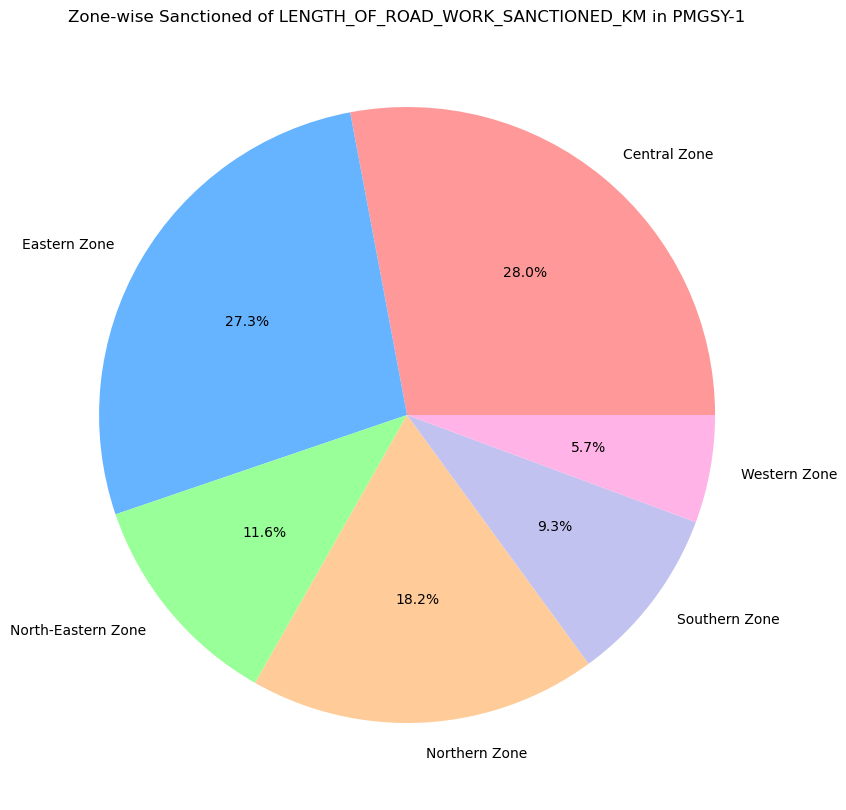

In [433]:
# Zone-wise pie chart for LENGTH_OF_ROAD_WORK_SANCTIONED_KM'

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
# ['Central Zone' 'Eastern Zone' 'North-Eastern Zone' 'Northern Zone' 'Southern Zone' 'Western Zone']

# Plotting the pie chart of the 'LENGTH_OF_ROAD_WORK_SANCTIONED_KM' grouped by 'ZONE'
plt.figure(figsize=(10, 10))
PMGSY1_subset_pie = PMGSY1_subset.groupby('ZONE')['LENGTH_OF_ROAD_WORK_SANCTIONED_KM'].sum().reset_index()
plt.pie(PMGSY1_subset_pie['LENGTH_OF_ROAD_WORK_SANCTIONED_KM'], labels=PMGSY1_subset_pie['ZONE'], autopct='%1.1f%%', colors=colors)
plt.title('Zone-wise Sanctioned of LENGTH_OF_ROAD_WORK_SANCTIONED_KM in PMGSY-1')
plt.show()

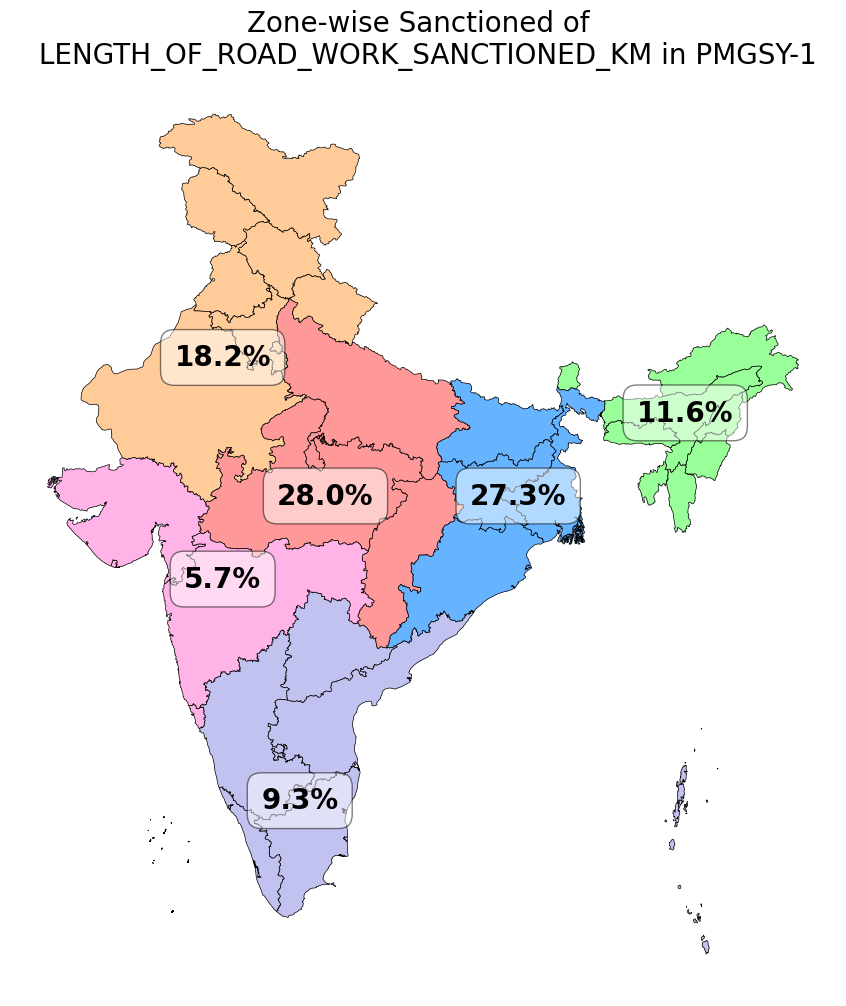

In [434]:
# Define the color scheme and zones with data
zone_data = {
    "Northern Zone": {"percentage": 18.2, "color": '#ffcc99'},
    "Southern Zone": {"percentage": 9.3, "color": '#c2c2f0'},
    "Eastern Zone": {"percentage": 27.3, "color": '#66b3ff'},
    "Western Zone": {"percentage": 5.7, "color": '#ffb3e6'},
    "Central Zone": {"percentage": 28.0, "color": '#ff9999'},
    "North-Eastern Zone": {"percentage": 11.6, "color": '#99ff99'}
}

# Zone definitions
india_zones = {
    "Northern Zone": {
        "States": ["Punjab", "Rajasthan", "Haryana", "Himachal Pradesh", "Uttaranchal"],
        "Union Territories": ["Delhi", "Ladakh", "Jammu and Kashmir", "Chandigarh"],
        "Headquarters": "Delhi"  # "New Delhi"
    },
    "Southern Zone": {
        "States": ["Andhra Pradesh", "Karnataka", "Kerala", "Tamil Nadu", "Telangana"],
        "Union Territories": ["Puducherry", "Lakshadweep", "Andaman and Nicobar"],
        "Headquarters": "Tamil Nadu"  # "Chennai"
    },
    "Eastern Zone": {
        "States": ["Bihar", "Jharkhand", "Orissa", "West Bengal"],
        "Headquarters": "West Bengal"  # "Kolkata"
    },
    "Western Zone": {
        "States": ["Goa", "Gujarat", "Maharashtra"],
        "Union Territories": ["DÄ\x81dra and Nagar Haveli and DamÄ\x81n and Diu"],
        "Headquarters": "Maharashtra"  # "Mumbai"
    },
    "Central Zone": {
        "States": ["Chhattisgarh", "Madhya Pradesh", "Uttar Pradesh", "Uttarakhand"],
        "Headquarters": "Uttar Pradesh"  # "Prayagraj"
    },
    "North-Eastern Zone": {
        "States": ["Arunachal Pradesh", "Assam", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Tripura", "Sikkim"],
        "Headquarters": "Meghalaya"  # "Shillong"
    }
}

# Load the shapefile of India's map
india_map = gpd.read_file('in_shp/in.shp')

# Use 'name' column for state/territory names
name_column = 'name'

# Function to assign zone based on state or union territory
def assign_zone(name):
    for zone, regions in india_zones.items():
        if name in regions.get("States", []) or name in regions.get("Union Territories", []):
            return zone
    return None  # If the name doesn't match any zone, return None

# Apply zone classification to each state/union territory
india_map['Zone'] = india_map[name_column].apply(assign_zone)

# Assign colors based on the zone
india_map['Color'] = india_map['Zone'].map(lambda x: zone_data[x]['color'] if x in zone_data else "#d3d3d3")

# Plotting the map with data overlays
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
india_map.plot(ax=ax, color=india_map['Color'], edgecolor='black', linewidth=0.5)

# Overlay data values from the pie chart
zone_centers = {
    #(left-right, bottom-up)
    "Northern Zone": (75, 28),
    "Southern Zone": (78, 12),
    "Eastern Zone": (86.5, 23),
    "Western Zone": (75, 20),
    "Central Zone": (79, 23),
    "North-Eastern Zone": (93, 26)
}

for zone, center in zone_centers.items():
    percentage = zone_data[zone]['percentage']
    ax.text(center[0], center[1], f"{percentage}%", ha='center', fontsize=20, fontweight='bold', color='black', 
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5')) #fontbackground

plt.title("Zone-wise Sanctioned of \n LENGTH_OF_ROAD_WORK_SANCTIONED_KM in PMGSY-1", fontsize=20)
plt.axis('off')
plt.show()


### Length to expenditures ratio

In [435]:
# Group the data based on the zones and save in a dataset the zone-wise sum of 'LENGTH_OF_ROAD_WORK_SANCTIONED_KM' and 'COST_OF_WORKS_SANCTIONED_LAKHS'
PMGSY1_subset_zone = PMGSY1_subset.groupby('ZONE').sum().reset_index()
PMGSY1_subset_zone

,ZONE,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS
0,Central Zone,ChhattisgarhChhattisgarhChhattisgarhChhattisga...,BalodBalodabazarBalrampurBastarBemetraBijapurB...,180306.840,58763.78902
1,Eastern Zone,BiharBiharBiharBiharBiharBiharBiharBiharBiharB...,ArariaArwalAurangabadBankaBegusaraiBhagalpurBh...,175836.747,82624.81855
2,North-Eastern Zone,Arunachal PradeshArunachal PradeshArunachal Pr...,AnjawChanglangDibang ValleyEast KamengEast Sia...,74555.806,45045.34901
3,Northern Zone,HaryanaHaryanaHaryanaHaryanaHaryanaHaryanaHary...,AmbalaBhiwaniCharkhi DadriFaridabadFatehabadGu...,117652.514,37881.14398
4,Southern Zone,Andaman And NicobarAndaman And NicobarAndaman ...,NicobarNorth and Middle AndamanSouth AndamanAl...,60050.511,16202.76707
5,Western Zone,GoaGoaGujaratGujaratGujaratGujaratGujaratGujar...,North GoaSouth GoaAhmedabadAmreliAnandArvalliB...,36469.587,9924.41412


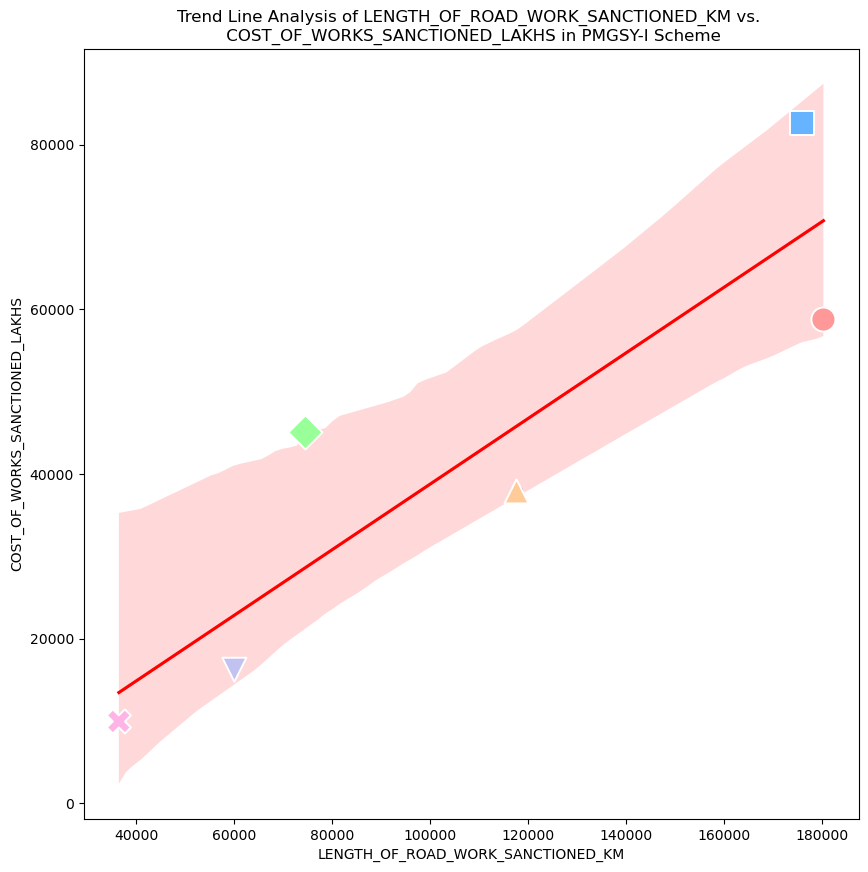

In [438]:
plt.figure(figsize=(10, 10))

# Create a scatter plot with a regression line (without confidence interval)
sns.regplot(x='LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 
            y='COST_OF_WORKS_SANCTIONED_LAKHS', 
            data=PMGSY1_subset_zone,
            scatter_kws={'s': 50}, # s: size of the points in the scatter plot
            ci = 95, # 95% confidence interval 
            line_kws={"color": "red"})

# Overlay the scatter plot with hue based on the 'ZONE'
markers = ['o', 's', 'D', '^', 'v', 'X']  # Circle, Square, Diamond, Triangle up, Triangle down, X
sns.scatterplot(x='LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 
                y='COST_OF_WORKS_SANCTIONED_LAKHS', 
                data=PMGSY1_subset_zone,
                hue='ZONE', 
                style='ZONE',  # Differentiating by markers
                markers=markers,
                palette=colors, # Add the color same as the pie chart
                s=300) # s: size of the points in the scatter plot

# plt.legend(loc='best', ncol=2, markerscale=1.5, borderpad=1.5, labelspacing=2.5, handletextpad=1)
# Turn off legend
plt.legend().remove()
plt.title('Trend Line Analysis of LENGTH_OF_ROAD_WORK_SANCTIONED_KM vs. \n COST_OF_WORKS_SANCTIONED_LAKHS in PMGSY-I Scheme')
plt.show()

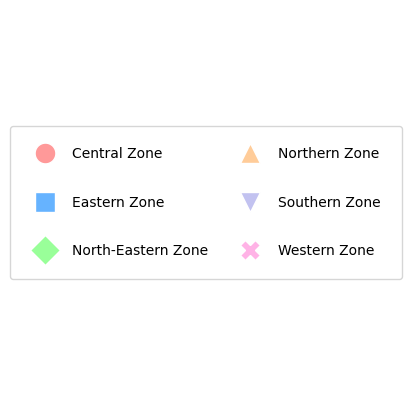

In [333]:
# Initialize a blank figure for the legend only

fig, ax = plt.subplots(figsize=(5, 5))

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
# ['Central Zone' 'Eastern Zone' 'North-Eastern Zone' 'Northern Zone' 'Southern Zone' 'Western Zone']
zones = ['Central Zone', 'Eastern Zone', 'North-Eastern Zone', 'Northern Zone', 'Southern Zone', 'Western Zone']

# Hide axes for a cleaner look

ax.axis('off')



# Generate legend items manually

legend_elements = [plt.Line2D([0], [0], marker=marker, color='w', label=zone, 

                              markerfacecolor=color, markersize=10) 

                   for zone, color, marker in zip(zones, colors, markers)]



# Add the legend to the plot

legend = ax.legend(handles=legend_elements, loc='center', ncol=2, markerscale=1.5, 

                   borderpad=1.5, labelspacing=2.5, handletextpad=1)



plt.show()

### PMGSY2_SCHEME

In [334]:
PMGSY2

,STATE_NAME,DISTRICT_NAME,PMGSY_SCHEME,NO_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,NO_OF_BRIDGES_COMPLETED,NO_OF_ROAD_WORKS_BALANCE,NO_OF_BRIDGES_BALANCE,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,LENGTH_OF_ROAD_WORK_COMPLETED_KM,EXPENDITURE_OCCURED_LAKHS,LENGTH_OF_ROAD_WORK_BALANCE_KM
3,Andhra Pradesh,Alluri Sitharama Raju,PMGSY-II,2,0,2,0,0,0,14.000,8.93850,12.395,6.4294,0.0
6,Andhra Pradesh,Anantapur,PMGSY-II,8,0,8,0,0,0,75.020,29.99530,74.961,27.1823,0.0
10,Andhra Pradesh,Bapatla,PMGSY-II,6,0,6,0,0,0,53.430,28.74360,53.763,24.3953,0.0
15,Andhra Pradesh,Kurnool,PMGSY-II,9,1,9,1,0,0,65.660,28.50850,65.021,26.8076,0.0
16,Andhra Pradesh,Nandyal,PMGSY-II,5,0,5,0,0,0,54.930,32.64160,53.622,28.8901,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,West Bengal,Birbhum,PMGSY-II,7,0,7,0,0,0,76.750,61.97305,76.221,59.7094,0.0
2245,West Bengal,Hooghly,PMGSY-II,15,0,15,0,0,0,96.426,74.68126,96.426,64.3534,0.0
2247,West Bengal,Murshidabad,PMGSY-II,14,0,14,0,0,0,162.946,105.63891,162.849,99.9851,0.0
2252,West Bengal,Purba Medinipur,PMGSY-II,11,2,11,2,0,0,101.850,82.46289,101.408,77.8186,0.0


In [335]:
# Select all rows of columns ['STATE_NAME', 'DISTRICT_NAME', 'LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 'COST_OF_WORKS_SANCTIONED_LAKHS']
PMGSY2_subset = PMGSY2[['STATE_NAME', 'DISTRICT_NAME', 'LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 'COST_OF_WORKS_SANCTIONED_LAKHS']]
# Reset index
PMGSY2_subset.reset_index(drop=True, inplace=True)
PMGSY2_subset

,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS
0,Andhra Pradesh,Alluri Sitharama Raju,14.000,8.93850
1,Andhra Pradesh,Anantapur,75.020,29.99530
2,Andhra Pradesh,Bapatla,53.430,28.74360
3,Andhra Pradesh,Kurnool,65.660,28.50850
4,Andhra Pradesh,Nandyal,54.930,32.64160
...,...,...,...,...
692,West Bengal,Birbhum,76.750,61.97305
693,West Bengal,Hooghly,96.426,74.68126
694,West Bengal,Murshidabad,162.946,105.63891
695,West Bengal,Purba Medinipur,101.850,82.46289


In [336]:
# Combine the rows with the same distinct and state names by adding their corresponding column values
PMGSY2_subset = PMGSY2_subset.groupby(['STATE_NAME', 'DISTRICT_NAME']).sum().reset_index()
PMGSY2_subset

,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS
0,Andaman And Nicobar,North and Middle Andaman,54.670,27.76460
1,Andaman And Nicobar,South Andaman,20.082,10.40950
2,Andhra Pradesh,Alluri Sitharama Raju,14.000,8.93850
3,Andhra Pradesh,Anakapalli,34.620,21.30900
4,Andhra Pradesh,Anantapur,75.020,29.99530
...,...,...,...,...
692,West Bengal,Purba Medinipur,101.850,82.46289
693,West Bengal,Purulia,143.660,112.21407
694,West Bengal,Siliguri M.P.,35.022,24.46831
695,West Bengal,South 24-Parganas,171.764,148.82442


In [337]:
# Number of unique districts
PMGSY2_subset['DISTRICT_NAME'].nunique()

692

In [338]:
# Combine the rows with the same distinct and state names by adding their corresponding column values
PMGSY2_subset = PMGSY2_subset.groupby(['STATE_NAME', 'DISTRICT_NAME']).sum().reset_index()
PMGSY2_subset

,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS
0,Andaman And Nicobar,North and Middle Andaman,54.670,27.76460
1,Andaman And Nicobar,South Andaman,20.082,10.40950
2,Andhra Pradesh,Alluri Sitharama Raju,14.000,8.93850
3,Andhra Pradesh,Anakapalli,34.620,21.30900
4,Andhra Pradesh,Anantapur,75.020,29.99530
...,...,...,...,...
692,West Bengal,Purba Medinipur,101.850,82.46289
693,West Bengal,Purulia,143.660,112.21407
694,West Bengal,Siliguri M.P.,35.022,24.46831
695,West Bengal,South 24-Parganas,171.764,148.82442


### Zonewise

In [339]:
india_zones = {
    "Northern Zone": {
        "States": ["Punjab", "Rajasthan", "Haryana", "Himachal Pradesh", "Uttaranchal"],
        "Union Territories": ["Delhi", "Ladakh", "Jammu And Kashmir", "Chandigarh"],
        "Headquarters": "Delhi"  # "New Delhi"
    },
    "Southern Zone": {
        "States": ["Andhra Pradesh", "Karnataka", "Kerala", "Tamil Nadu", "Telangana"],
        "Union Territories": ["Puducherry", "Lakshadweep", "Andaman And Nicobar"],
        "Headquarters": "Tamil Nadu"  # "Chennai"
    },
    "Eastern Zone": {
        "States": ["Bihar", "Jharkhand", "Odisha", "West Bengal"],
        "Headquarters": "West Bengal"  # "Kolkata"
    },
    "Western Zone": {
        "States": ["Goa", "Gujarat", "Maharashtra"],
        "Union Territories": ["DÄ\x81dra and Nagar Haveli and DamÄ\x81n and Diu"],
        "Headquarters": "Maharashtra"  # "Mumbai"
    },
    "Central Zone": {
        "States": ["Chhattisgarh", "Madhya Pradesh", "Uttar Pradesh", "Uttarakhand"],
        "Headquarters": "Uttar Pradesh"  # "Prayagraj"
    },
    "North-Eastern Zone": {
        "States": ["Arunachal Pradesh", "Assam", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Tripura", "Sikkim"],
        "Headquarters": "Meghalaya"  # "Shillong"
    }
}

In [340]:
# Create a new column 'ZONE' in the PMGSY2_subset dataframe
PMGSY2_subset['ZONE'] = np.nan
PMGSY2_subset['ZONE'] = PMGSY2_subset['ZONE'].astype('object')

# Assign the zone based on the 'STATE_NAME' with comparing without case sensitivity
for zone, states in india_zones.items():
    PMGSY2_subset.loc[PMGSY2_subset['STATE_NAME'].str.upper().isin([state.upper() for state in states['States']]), 'ZONE'] = zone

# For Nan rows of zone, check for the State names in the Union Territories
for zone, states in india_zones.items():
    if 'Union Territories' in states:
        PMGSY2_subset.loc[PMGSY2_subset['STATE_NAME'].str.upper().isin([state.upper() for state in states['Union Territories']]), 'ZONE'] = zone

PMGSY2_subset


,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,ZONE
0,Andaman And Nicobar,North and Middle Andaman,54.670,27.76460,Southern Zone
1,Andaman And Nicobar,South Andaman,20.082,10.40950,Southern Zone
2,Andhra Pradesh,Alluri Sitharama Raju,14.000,8.93850,Southern Zone
3,Andhra Pradesh,Anakapalli,34.620,21.30900,Southern Zone
4,Andhra Pradesh,Anantapur,75.020,29.99530,Southern Zone
...,...,...,...,...,...
692,West Bengal,Purba Medinipur,101.850,82.46289,Eastern Zone
693,West Bengal,Purulia,143.660,112.21407,Eastern Zone
694,West Bengal,Siliguri M.P.,35.022,24.46831,Eastern Zone
695,West Bengal,South 24-Parganas,171.764,148.82442,Eastern Zone


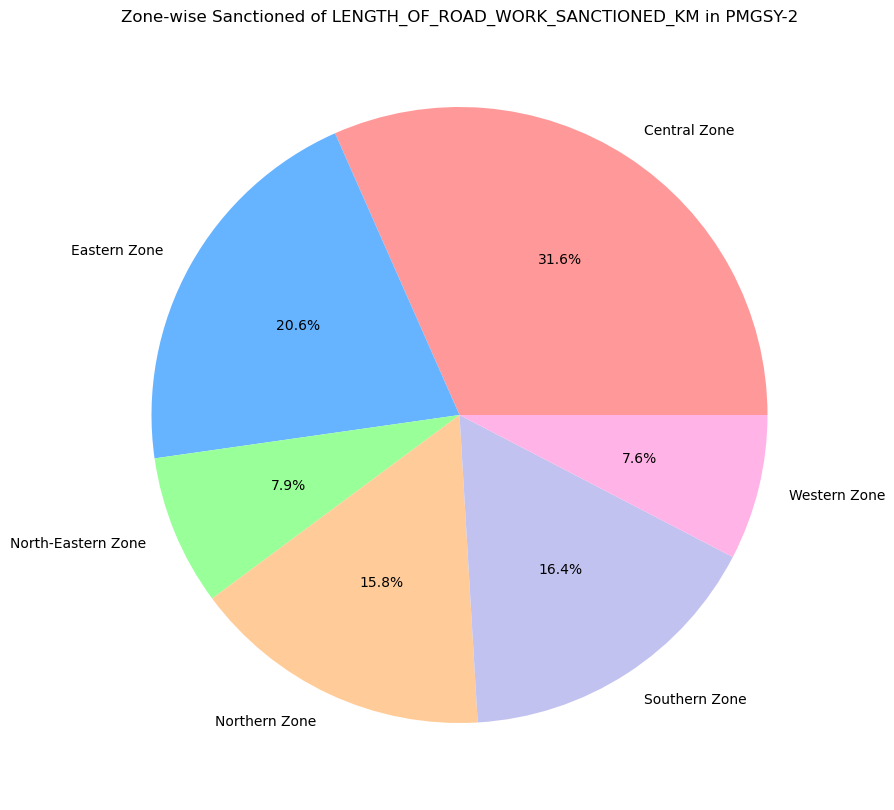

In [341]:
# Zone-wise pie chart for LENGTH_OF_ROAD_WORK_SANCTIONED_KM'

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
# ['Central Zone' 'Eastern Zone' 'North-Eastern Zone' 'Northern Zone' 'Southern Zone' 'Western Zone']

# Plotting the pie chart of the 'LENGTH_OF_ROAD_WORK_SANCTIONED_KM' grouped by 'ZONE'
plt.figure(figsize=(10, 10))
PMGSY2_subset_pie = PMGSY2_subset.groupby('ZONE')['LENGTH_OF_ROAD_WORK_SANCTIONED_KM'].sum().reset_index()
plt.pie(PMGSY2_subset_pie['LENGTH_OF_ROAD_WORK_SANCTIONED_KM'], labels=PMGSY2_subset_pie['ZONE'], autopct='%1.1f%%', colors=colors)
plt.title('Zone-wise Sanctioned of LENGTH_OF_ROAD_WORK_SANCTIONED_KM in PMGSY-2')
plt.show()

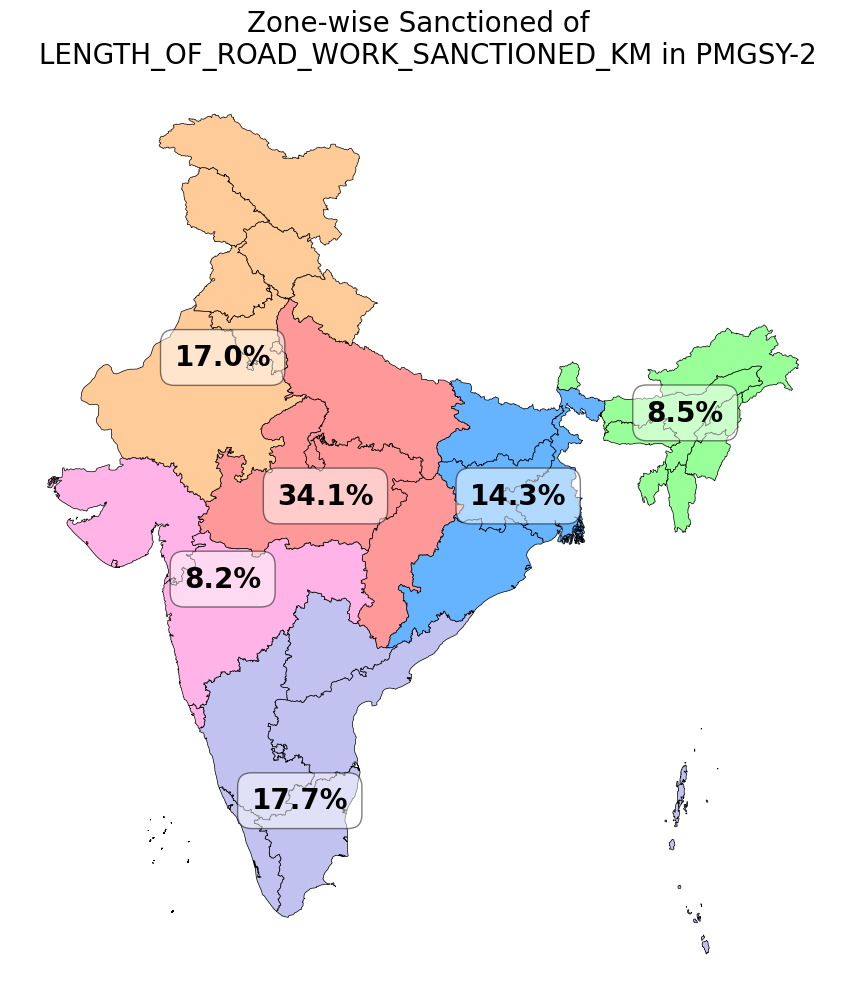

In [342]:
# Define the color scheme and zones with data
zone_data = {
    "Northern Zone": {"percentage": 17.0, "color": '#ffcc99'},
    "Southern Zone": {"percentage": 17.7, "color": '#c2c2f0'},
    "Eastern Zone": {"percentage": 14.3, "color": '#66b3ff'},
    "Western Zone": {"percentage": 8.2, "color": '#ffb3e6'},
    "Central Zone": {"percentage": 34.1, "color": '#ff9999'},
    "North-Eastern Zone": {"percentage": 8.5, "color": '#99ff99'}
}

# Zone definitions
india_zones = {
    "Northern Zone": {
        "States": ["Punjab", "Rajasthan", "Haryana", "Himachal Pradesh", "Uttaranchal"],
        "Union Territories": ["Delhi", "Ladakh", "Jammu and Kashmir", "Chandigarh"],
        "Headquarters": "Delhi"  # "New Delhi"
    },
    "Southern Zone": {
        "States": ["Andhra Pradesh", "Karnataka", "Kerala", "Tamil Nadu", "Telangana"],
        "Union Territories": ["Puducherry", "Lakshadweep", "Andaman and Nicobar"],
        "Headquarters": "Tamil Nadu"  # "Chennai"
    },
    "Eastern Zone": {
        "States": ["Bihar", "Jharkhand", "Orissa", "West Bengal"],
        "Headquarters": "West Bengal"  # "Kolkata"
    },
    "Western Zone": {
        "States": ["Goa", "Gujarat", "Maharashtra"],
        "Union Territories": ["DÄ\x81dra and Nagar Haveli and DamÄ\x81n and Diu"],
        "Headquarters": "Maharashtra"  # "Mumbai"
    },
    "Central Zone": {
        "States": ["Chhattisgarh", "Madhya Pradesh", "Uttar Pradesh", "Uttarakhand"],
        "Headquarters": "Uttar Pradesh"  # "Prayagraj"
    },
    "North-Eastern Zone": {
        "States": ["Arunachal Pradesh", "Assam", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Tripura", "Sikkim"],
        "Headquarters": "Meghalaya"  # "Shillong"
    }
}

# Load the shapefile of India's map
india_map = gpd.read_file('in_shp/in.shp')

# Use 'name' column for state/territory names
name_column = 'name'

# Function to assign zone based on state or union territory
def assign_zone(name):
    for zone, regions in india_zones.items():
        if name in regions.get("States", []) or name in regions.get("Union Territories", []):
            return zone
    return None  # If the name doesn't match any zone, return None

# Apply zone classification to each state/union territory
india_map['Zone'] = india_map[name_column].apply(assign_zone)

# Assign colors based on the zone
india_map['Color'] = india_map['Zone'].map(lambda x: zone_data[x]['color'] if x in zone_data else "#d3d3d3")

# Plotting the map with data overlays
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
india_map.plot(ax=ax, color=india_map['Color'], edgecolor='black', linewidth=0.5)

# Overlay data values from the pie chart
zone_centers = {
    #(left-right, bottom-up)
    "Northern Zone": (75, 28),
    "Southern Zone": (78, 12),
    "Eastern Zone": (86.5, 23),
    "Western Zone": (75, 20),
    "Central Zone": (79, 23),
    "North-Eastern Zone": (93, 26)
}

for zone, center in zone_centers.items():
    percentage = zone_data[zone]['percentage']
    ax.text(center[0], center[1], f"{percentage}%", ha='center', fontsize=20, fontweight='bold', color='black', 
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5')) #fontbackground

plt.title("Zone-wise Sanctioned of \n LENGTH_OF_ROAD_WORK_SANCTIONED_KM in PMGSY-2", fontsize=20)
plt.axis('off')
plt.show()


### Length to expenditures ratio

In [343]:
PMGSY2_subset_zone = PMGSY2_subset.groupby('ZONE').sum().reset_index()
PMGSY2_subset_zone

,ZONE,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS
0,Central Zone,ChhattisgarhChhattisgarhChhattisgarhChhattisga...,BalodBalodabazarBastarBemetraBijapurBilaspurDa...,15745.315,10141.61143
1,Eastern Zone,BiharBiharBiharBiharBiharBiharBiharBiharBiharB...,ArariaArwalAurangabadBankaBegusaraiBhagalpurBh...,10272.987,6472.32617
2,North-Eastern Zone,Arunachal PradeshArunachal PradeshArunachal Pr...,ChanglangDibang ValleyEast SiangKamaleKra Daad...,3937.427,3396.42629
3,Northern Zone,HaryanaHaryanaHaryanaHaryanaHaryanaHaryanaHary...,AmbalaBhiwaniFaridabadGurgaonHisarJhajjarJindK...,7859.363,5097.83384
4,Southern Zone,Andaman And NicobarAndaman And NicobarAndhra P...,North and Middle AndamanSouth AndamanAlluri Si...,8180.627,4291.87692
5,Western Zone,GujaratGujaratGujaratGujaratGujaratGujaratGuja...,AhmedabadAmreliAnandArvalliBanaskanthaBharuchB...,3799.216,2326.29040


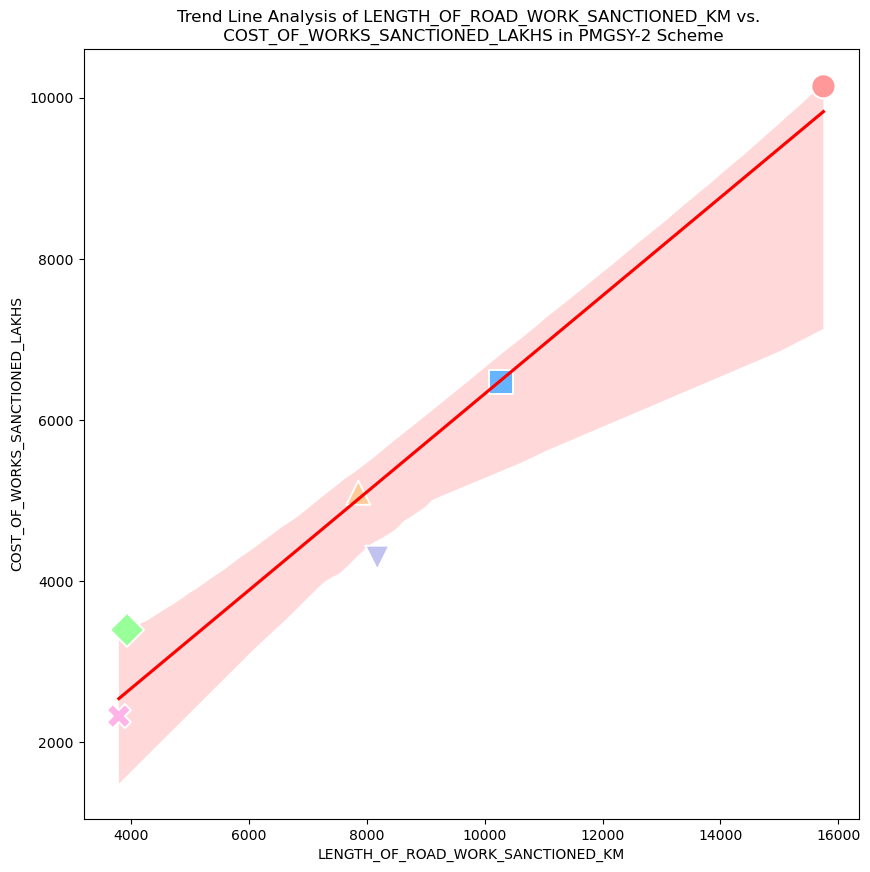

In [344]:
plt.figure(figsize=(10, 10))

# Create a scatter plot with a regression line (without confidence interval)
sns.regplot(x='LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 
            y='COST_OF_WORKS_SANCTIONED_LAKHS', 
            data=PMGSY2_subset_zone,
            scatter_kws={'s': 50}, # s: size of the points in the scatter plot
            ci = 95, # 95% confidence interval 
            line_kws={"color": "red"})

# Overlay the scatter plot with hue based on the 'ZONE'
markers = ['o', 's', 'D', '^', 'v', 'X']  # Circle, Square, Diamond, Triangle up, Triangle down, X
sns.scatterplot(x='LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 
                y='COST_OF_WORKS_SANCTIONED_LAKHS', 
                data=PMGSY2_subset_zone,
                hue='ZONE', 
                style='ZONE',  # Differentiating by markers
                markers=markers,
                palette=colors, # Add the color same as the pie chart
                s=300) # s: size of the points in the scatter plot

# plt.legend(loc='best', ncol=2, markerscale=1.5, borderpad=1.5, labelspacing=2.5, handletextpad=1)
# Turn off legend
plt.legend().remove()
plt.title('Trend Line Analysis of LENGTH_OF_ROAD_WORK_SANCTIONED_KM vs. \n COST_OF_WORKS_SANCTIONED_LAKHS in PMGSY-2 Scheme')
plt.show()

### PMGSY3_SCHEME

In [357]:
PMGSY3

,STATE_NAME,DISTRICT_NAME,PMGSY_SCHEME,NO_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,NO_OF_BRIDGES_COMPLETED,NO_OF_ROAD_WORKS_BALANCE,NO_OF_BRIDGES_BALANCE,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,LENGTH_OF_ROAD_WORK_COMPLETED_KM,EXPENDITURE_OCCURED_LAKHS,LENGTH_OF_ROAD_WORK_BALANCE_KM
7,Andhra Pradesh,Anantapur,PMGSY-III,16,5,14,0,2,5,145.623,109.83990,122.207,68.1403,18.700
9,Andhra Pradesh,Annamayya,PMGSY-III,52,1,28,0,24,1,386.961,222.36631,199.515,101.0857,181.581
14,Andhra Pradesh,Kakinada,PMGSY-III,12,1,4,0,8,1,87.620,47.53970,24.850,10.6521,61.040
17,Andhra Pradesh,Nandyal,PMGSY-III,12,3,11,1,1,2,113.910,87.63180,101.894,73.3457,6.500
24,Arunachal Pradesh,Dibang Valley,PMGSY-III,3,3,0,0,3,3,26.200,47.34870,0.000,1.1624,26.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,Uttarakhand,Rudraprayag,PMGSY-III,7,0,0,0,7,0,92.025,86.61822,11.600,13.6896,80.425
2242,Uttarakhand,Uttarkashi,PMGSY-III,25,0,0,0,25,0,238.812,206.92790,1.500,3.4860,237.312
2248,West Bengal,Nadia,PMGSY-III,24,1,7,0,17,1,138.848,106.38457,59.647,30.9203,79.388
2250,West Bengal,North 24 Parganas,PMGSY-III,51,0,1,0,50,0,303.252,215.07294,72.984,35.4804,230.268


In [358]:
# Select all rows of columns ['STATE_NAME', 'DISTRICT_NAME', 'LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 'COST_OF_WORKS_SANCTIONED_LAKHS']
PMGSY3_subset = PMGSY3[['STATE_NAME', 'DISTRICT_NAME', 'LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 'COST_OF_WORKS_SANCTIONED_LAKHS']]
# Reset index
PMGSY3_subset.reset_index(drop=True, inplace=True)
PMGSY3_subset

,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS
0,Andhra Pradesh,Anantapur,145.623,109.83990
1,Andhra Pradesh,Annamayya,386.961,222.36631
2,Andhra Pradesh,Kakinada,87.620,47.53970
3,Andhra Pradesh,Nandyal,113.910,87.63180
4,Arunachal Pradesh,Dibang Valley,26.200,47.34870
...,...,...,...,...
705,Uttarakhand,Rudraprayag,92.025,86.61822
706,Uttarakhand,Uttarkashi,238.812,206.92790
707,West Bengal,Nadia,138.848,106.38457
708,West Bengal,North 24 Parganas,303.252,215.07294


In [359]:
# Combine the rows with the same distinct and state names by adding their corresponding column values
PMGSY3_subset = PMGSY3_subset.groupby(['STATE_NAME', 'DISTRICT_NAME']).sum().reset_index()
PMGSY3_subset

,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS
0,Andhra Pradesh,Alluri Sitharama Raju,29.100,15.62000
1,Andhra Pradesh,Anakapalli,92.275,60.77811
2,Andhra Pradesh,Anantapur,145.623,109.83990
3,Andhra Pradesh,Annamayya,386.961,222.36631
4,Andhra Pradesh,Bapatla,82.069,87.31000
...,...,...,...,...
705,West Bengal,Purba Medinipur,314.717,240.26852
706,West Bengal,Purulia,187.967,114.75549
707,West Bengal,Siliguri M.P.,44.827,28.08356
708,West Bengal,South 24-Parganas,320.352,226.43533


In [369]:
# Number of unique districts
PMGSY3_subset['DISTRICT_NAME'].nunique()

704

In [370]:
# Combine the rows with the same distinct and state names by adding their corresponding column values
PMGSY3_subset = PMGSY3_subset.groupby(['STATE_NAME', 'DISTRICT_NAME']).sum().reset_index()
PMGSY3_subset

,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,ZONE
0,Andhra Pradesh,Alluri Sitharama Raju,29.100,15.62000,0.0
1,Andhra Pradesh,Anakapalli,92.275,60.77811,0.0
2,Andhra Pradesh,Anantapur,145.623,109.83990,0.0
3,Andhra Pradesh,Annamayya,386.961,222.36631,0.0
4,Andhra Pradesh,Bapatla,82.069,87.31000,0.0
...,...,...,...,...,...
705,West Bengal,Purba Medinipur,314.717,240.26852,0.0
706,West Bengal,Purulia,187.967,114.75549,0.0
707,West Bengal,Siliguri M.P.,44.827,28.08356,0.0
708,West Bengal,South 24-Parganas,320.352,226.43533,0.0


### Zonewise

In [371]:
india_zones = {
    "Northern Zone": {
        "States": ["Punjab", "Rajasthan", "Haryana", "Himachal Pradesh", "Uttaranchal"],
        "Union Territories": ["Delhi", "Ladakh", "Jammu And Kashmir", "Chandigarh"],
        "Headquarters": "Delhi"  # "New Delhi"
    },
    "Southern Zone": {
        "States": ["Andhra Pradesh", "Karnataka", "Kerala", "Tamil Nadu", "Telangana"],
        "Union Territories": ["Puducherry", "Lakshadweep", "Andaman And Nicobar"],
        "Headquarters": "Tamil Nadu"  # "Chennai"
    },
    "Eastern Zone": {
        "States": ["Bihar", "Jharkhand", "Odisha", "West Bengal"],
        "Headquarters": "West Bengal"  # "Kolkata"
    },
    "Western Zone": {
        "States": ["Goa", "Gujarat", "Maharashtra"],
        "Union Territories": ["DÄ\x81dra and Nagar Haveli and DamÄ\x81n and Diu"],
        "Headquarters": "Maharashtra"  # "Mumbai"
    },
    "Central Zone": {
        "States": ["Chhattisgarh", "Madhya Pradesh", "Uttar Pradesh", "Uttarakhand"],
        "Headquarters": "Uttar Pradesh"  # "Prayagraj"
    },
    "North-Eastern Zone": {
        "States": ["Arunachal Pradesh", "Assam", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Tripura", "Sikkim"],
        "Headquarters": "Meghalaya"  # "Shillong"
    }
}

In [372]:
# Create a new column 'ZONE' in the PMGSY3_subset dataframe
PMGSY3_subset['ZONE'] = np.nan
PMGSY3_subset['ZONE'] = PMGSY3_subset['ZONE'].astype('object')

# Apply zone classification to each state/union territory
for zone, states in india_zones.items():
    PMGSY3_subset.loc[PMGSY3_subset['STATE_NAME'].str.upper().isin([state.upper() for state in states['States']]), 'ZONE'] =  zone

# For Nan rows of zone, check for the State names in the Union Territories
for zone, states in india_zones.items():
    if 'Union Territories' in states:
        PMGSY3_subset.loc[PMGSY3_subset['STATE_NAME'].str.upper().isin([state.upper() for state in states['Union Territories']]), 'ZONE'] = zone

PMGSY3_subset

,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,ZONE
0,Andhra Pradesh,Alluri Sitharama Raju,29.100,15.62000,Southern Zone
1,Andhra Pradesh,Anakapalli,92.275,60.77811,Southern Zone
2,Andhra Pradesh,Anantapur,145.623,109.83990,Southern Zone
3,Andhra Pradesh,Annamayya,386.961,222.36631,Southern Zone
4,Andhra Pradesh,Bapatla,82.069,87.31000,Southern Zone
...,...,...,...,...,...
705,West Bengal,Purba Medinipur,314.717,240.26852,Eastern Zone
706,West Bengal,Purulia,187.967,114.75549,Eastern Zone
707,West Bengal,Siliguri M.P.,44.827,28.08356,Eastern Zone
708,West Bengal,South 24-Parganas,320.352,226.43533,Eastern Zone


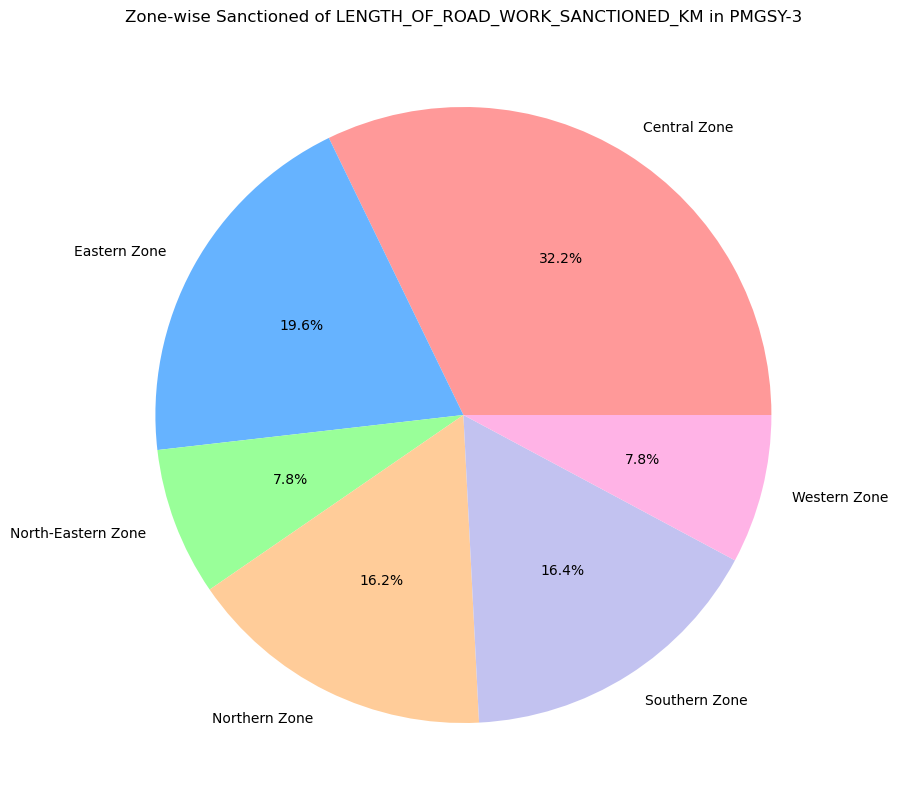

In [373]:
# Zone-wise pie chart for LENGTH_OF_ROAD_WORK_SANCTIONED_KM'

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
# ['Central Zone' 'Eastern Zone' 'North-Eastern Zone' 'Northern Zone' 'Southern Zone' 'Western Zone']

# Plotting the pie chart of the 'LENGTH_OF_ROAD_WORK_SANCTIONED_KM' grouped by 'ZONE'
plt.figure(figsize=(10, 10))
PMGSY3_subset_pie = PMGSY3_subset.groupby('ZONE')['LENGTH_OF_ROAD_WORK_SANCTIONED_KM'].sum().reset_index()
plt.pie(PMGSY3_subset_pie['LENGTH_OF_ROAD_WORK_SANCTIONED_KM'], labels=PMGSY3_subset_pie['ZONE'], autopct='%1.1f%%', colors=colors)
plt.title('Zone-wise Sanctioned of LENGTH_OF_ROAD_WORK_SANCTIONED_KM in PMGSY-3')
plt.show()

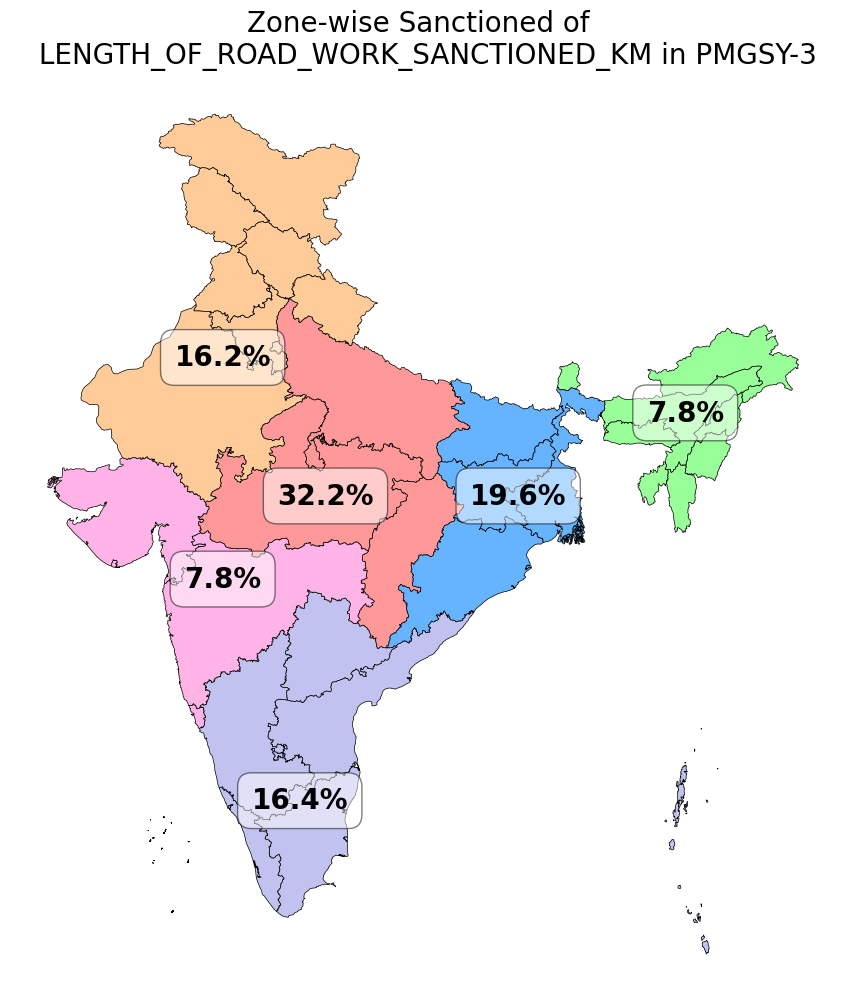

In [374]:
zone_data = {
    "Northern Zone": {"percentage": 16.2, "color": '#ffcc99'},
    "Southern Zone": {"percentage": 16.4, "color": '#c2c2f0'},
    "Eastern Zone": {"percentage": 19.6, "color": '#66b3ff'},
    "Western Zone": {"percentage": 7.8, "color": '#ffb3e6'},
    "Central Zone": {"percentage": 32.2, "color": '#ff9999'},
    "North-Eastern Zone": {"percentage": 7.8, "color": '#99ff99'}
}

# Zone definitions
india_zones = {
    "Northern Zone": {
        "States": ["Punjab", "Rajasthan", "Haryana", "Himachal Pradesh", "Uttaranchal"],
        "Union Territories": ["Delhi", "Ladakh", "Jammu and Kashmir", "Chandigarh"],
        "Headquarters": "Delhi"  # "New Delhi"
    },
    "Southern Zone": {
        "States": ["Andhra Pradesh", "Karnataka", "Kerala", "Tamil Nadu", "Telangana"],
        "Union Territories": ["Puducherry", "Lakshadweep", "Andaman and Nicobar"],
        "Headquarters": "Tamil Nadu"  # "Chennai"
    },
    "Eastern Zone": {
        "States": ["Bihar", "Jharkhand", "Orissa", "West Bengal"],
        "Headquarters": "West Bengal"  # "Kolkata"
    },
    "Western Zone": {
        "States": ["Goa", "Gujarat", "Maharashtra"],
        "Union Territories": ["DÄ\x81dra and Nagar Haveli and DamÄ\x81n and Diu"],
        "Headquarters": "Maharashtra"  # "Mumbai"
    },
    "Central Zone": {
        "States": ["Chhattisgarh", "Madhya Pradesh", "Uttar Pradesh", "Uttarakhand"],
        "Headquarters": "Uttar Pradesh"  # "Prayagraj"
    },
    "North-Eastern Zone": {
        "States": ["Arunachal Pradesh", "Assam", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Tripura", "Sikkim"],
        "Headquarters": "Meghalaya"  # "Shillong"
    }
}

# Load the shapefile of India's map
india_map = gpd.read_file('in_shp/in.shp')

# Function to assign zone based on state or union territory
def assign_zone(name):
    for zone, regions in india_zones.items():
        if name in regions.get("States", []) or name in regions.get("Union Territories", []):
            return zone
    return None  # If the name doesn't match any zone, return None

# Apply zone classification to each state/union territory
india_map['Zone'] = india_map[name_column].apply(assign_zone)

# Assign colors based on the zone
india_map['Color'] = india_map['Zone'].map(lambda x: zone_data[x]['color'] if x in zone_data else "#d3d3d3")

# Plotting the map with data overlays
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
india_map.plot(ax=ax, color=india_map['Color'], edgecolor='black', linewidth=0.5)

# Overlay data values from the pie chart
zone_centers = {
    #(left-right, bottom-up)
    "Northern Zone": (75, 28),
    "Southern Zone": (78, 12),
    "Eastern Zone": (86.5, 23),
    "Western Zone": (75, 20),
    "Central Zone": (79, 23),
    "North-Eastern Zone": (93, 26)
}

for zone, center in zone_centers.items():
    percentage = zone_data[zone]['percentage']
    ax.text(center[0], center[1], f"{percentage}%", ha='center', fontsize=20, fontweight='bold', color='black', 
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5')) #fontbackground

plt.title("Zone-wise Sanctioned of \n LENGTH_OF_ROAD_WORK_SANCTIONED_KM in PMGSY-3", fontsize=20)
plt.axis('off')
plt.show()


### Length to expenditures ratio

In [376]:
PMGSY3_subset

,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,ZONE
0,Andhra Pradesh,Alluri Sitharama Raju,29.100,15.62000,Southern Zone
1,Andhra Pradesh,Anakapalli,92.275,60.77811,Southern Zone
2,Andhra Pradesh,Anantapur,145.623,109.83990,Southern Zone
3,Andhra Pradesh,Annamayya,386.961,222.36631,Southern Zone
4,Andhra Pradesh,Bapatla,82.069,87.31000,Southern Zone
...,...,...,...,...,...
705,West Bengal,Purba Medinipur,314.717,240.26852,Eastern Zone
706,West Bengal,Purulia,187.967,114.75549,Eastern Zone
707,West Bengal,Siliguri M.P.,44.827,28.08356,Eastern Zone
708,West Bengal,South 24-Parganas,320.352,226.43533,Eastern Zone


In [377]:
PMGSY3_subset_zone = PMGSY3_subset.groupby('ZONE').sum().reset_index()
PMGSY3_subset_zone

,ZONE,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS
0,Central Zone,ChhattisgarhChhattisgarhChhattisgarhChhattisga...,BalodBalodabazarBalrampurBastarBemetraBijapurB...,39163.095,30298.91979
1,Eastern Zone,BiharBiharBiharBiharBiharBiharBiharBiharBiharB...,ArariaArwalAurangabadBankaBegusaraiBhagalpurBh...,23864.888,19111.59578
2,North-Eastern Zone,Arunachal PradeshArunachal PradeshArunachal Pr...,ChanglangDibang ValleyEast KamengEast SiangKam...,9458.166,8415.45044
3,Northern Zone,HaryanaHaryanaHaryanaHaryanaHaryanaHaryanaHary...,AmbalaBhiwaniCharkhi DadriFaridabadFatehabadHi...,19727.594,15057.38516
4,Southern Zone,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,Alluri Sitharama RajuAnakapalliAnantapurAnnama...,19909.043,13877.79676
5,Western Zone,GujaratGujaratGujaratGujaratGujaratGujaratGuja...,AhmedabadAmreliAnandArvalliBanaskanthaBharuchB...,9514.806,8039.42270


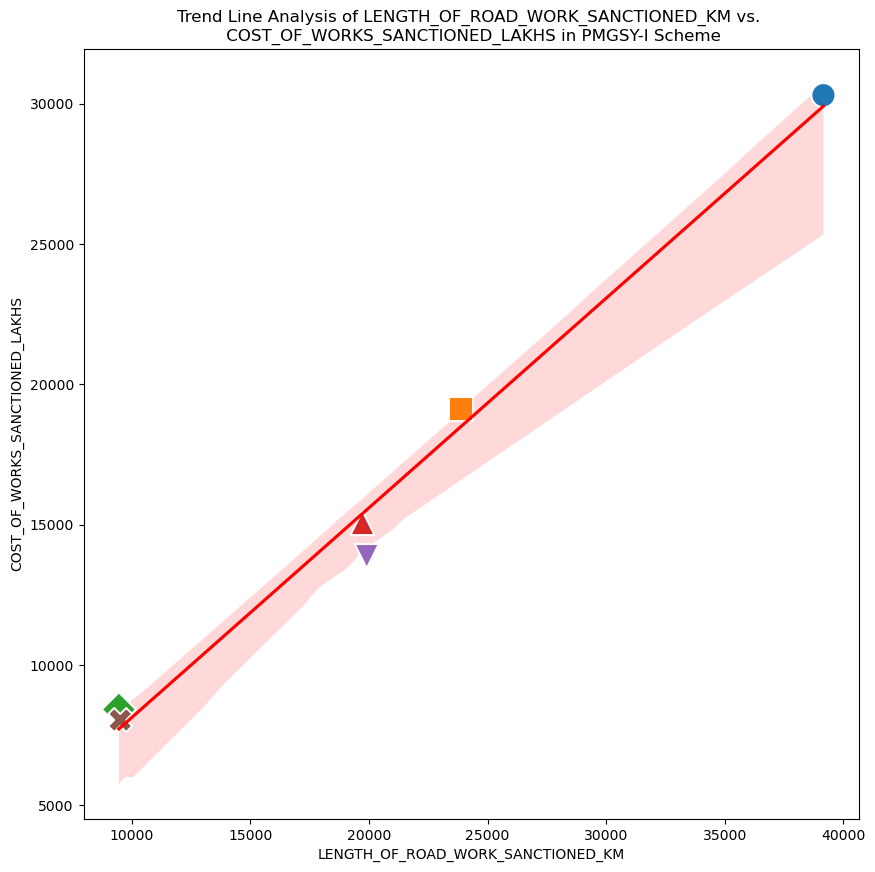

In [381]:
plt.figure(figsize=(10, 10))

# Create a scatter plot with a regression line (without confidence interval)
sns.regplot(x='LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 
            y='COST_OF_WORKS_SANCTIONED_LAKHS', 
            data=PMGSY3_subset_zone,
            scatter_kws={'s': 50}, # s: size of the points in the scatter plot
            ci = 95, # 95% confidence interval
            line_kws={'color':'red'})

# Overlay the scatter plot with hue based on the 'ZONE'
markers = ['o', 's', 'D', '^', 'v', 'X']  # Circle, Square, Diamond, Triangle up, Triangle down, X
sns.scatterplot(x='LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 
                y='COST_OF_WORKS_SANCTIONED_LAKHS', 
                data=PMGSY3_subset_zone,
                hue='ZONE',
                style='ZONE',
                markers=markers,
                s=300)

# plt.legend(loc='best', ncol=2, markerscale=1.5, borderpad=1.5, labelspacing=2.5, handletextpad=1)
# Turn off legend
plt.legend().remove()
plt.title('Trend Line Analysis of LENGTH_OF_ROAD_WORK_SANCTIONED_KM vs. \n COST_OF_WORKS_SANCTIONED_LAKHS in PMGSY-I Scheme')
plt.show()


### RCPLWEA Scheme

In [245]:
RCPLWEA

,STATE_NAME,DISTRICT_NAME,PMGSY_SCHEME,NO_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,NO_OF_BRIDGES_COMPLETED,NO_OF_ROAD_WORKS_BALANCE,NO_OF_BRIDGES_BALANCE,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,LENGTH_OF_ROAD_WORK_COMPLETED_KM,EXPENDITURE_OCCURED_LAKHS,LENGTH_OF_ROAD_WORK_BALANCE_KM
13,Andhra Pradesh,Kakinada,RCPLWEA,3,0,3,0,0,0,19.470,12.19000,19.470,10.7893,0.000
60,Bihar,Banka,RCPLWEA,11,16,11,16,0,0,183.075,272.19727,181.293,217.3813,0.000
68,Bihar,Nawada,RCPLWEA,17,10,16,10,1,0,217.440,278.48476,203.584,211.7195,0.795
73,Bihar,Rohtas,RCPLWEA,22,2,20,2,2,0,89.770,97.69917,85.905,74.8447,3.625
87,Chhattisgarh,Dantewada,RCPLWEA,17,3,14,2,3,1,156.525,192.47540,123.825,102.2007,32.700
100,Chhattisgarh,Narayanpur,RCPLWEA,10,8,0,1,10,7,123.400,117.13870,7.000,25.2453,116.400
162,Jharkhand,Gumla,RCPLWEA,17,30,11,26,6,4,264.960,296.89745,225.400,265.6960,39.590
297,Odisha,Koraput,RCPLWEA,19,2,18,0,1,2,146.768,140.64949,140.469,121.3137,5.087
384,Telangana,Jayashankar Bhoopalapally,RCPLWEA,11,4,2,2,9,2,78.700,94.07464,34.277,51.4233,44.043
417,Uttar Pradesh,Chandauli,RCPLWEA,7,0,7,0,0,0,80.925,45.63260,80.550,42.1013,0.000


In [246]:
# Select all rows of columns ['STATE_NAME', 'DISTRICT_NAME', 'LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 'COST_OF_WORKS_SANCTIONED_LAKHS']
RCPLWEA_subset = RCPLWEA[['STATE_NAME', 'DISTRICT_NAME', 'LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 'COST_OF_WORKS_SANCTIONED_LAKHS']]
# Reset index
RCPLWEA_subset.reset_index(drop=True, inplace=True)
RCPLWEA_subset

,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS
0,Andhra Pradesh,Kakinada,19.470,12.19000
1,Bihar,Banka,183.075,272.19727
2,Bihar,Nawada,217.440,278.48476
3,Bihar,Rohtas,89.770,97.69917
4,Chhattisgarh,Dantewada,156.525,192.47540
5,Chhattisgarh,Narayanpur,123.400,117.13870
6,Jharkhand,Gumla,264.960,296.89745
7,Odisha,Koraput,146.768,140.64949
8,Telangana,Jayashankar Bhoopalapally,78.700,94.07464
9,Uttar Pradesh,Chandauli,80.925,45.63260


In [247]:
# Combine the rows with the same distinct and state names by adding their corresponding column values
RCPLWEA_subset = RCPLWEA_subset.groupby(['STATE_NAME', 'DISTRICT_NAME']).sum().reset_index()
RCPLWEA_subset

,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS
0,Andhra Pradesh,Alluri Sitharama Raju,1084.885,827.64173
1,Andhra Pradesh,Kakinada,19.470,12.19000
2,Andhra Pradesh,Parvathipuram Manyam,385.484,353.27394
3,Andhra Pradesh,Srikakulam,68.146,54.85660
4,Bihar,Aurangabad,410.667,434.77915
5,Bihar,Banka,183.075,272.19727
6,Bihar,Gaya,290.228,299.64982
7,Bihar,Jamui,414.657,549.95709
8,Bihar,Lakhisarai,16.415,14.40069
9,Bihar,Muzaffarpur,358.548,521.57931


In [248]:
# Number of unique districts
RCPLWEA_subset['DISTRICT_NAME'].nunique()

55

In [249]:
# Combine the rows with the same distinct and state names by adding their corresponding column values
RCPLWEA_subset = RCPLWEA_subset.groupby(['STATE_NAME', 'DISTRICT_NAME']).sum().reset_index()
RCPLWEA_subset

,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS
0,Andhra Pradesh,Alluri Sitharama Raju,1084.885,827.64173
1,Andhra Pradesh,Kakinada,19.470,12.19000
2,Andhra Pradesh,Parvathipuram Manyam,385.484,353.27394
3,Andhra Pradesh,Srikakulam,68.146,54.85660
4,Bihar,Aurangabad,410.667,434.77915
5,Bihar,Banka,183.075,272.19727
6,Bihar,Gaya,290.228,299.64982
7,Bihar,Jamui,414.657,549.95709
8,Bihar,Lakhisarai,16.415,14.40069
9,Bihar,Muzaffarpur,358.548,521.57931


### Zonewise

In [250]:
india_zones = {
    "Northern Zone": {
        "States": ["Punjab", "Rajasthan", "Haryana", "Himachal Pradesh", "Uttaranchal"],
        "Union Territories": ["Delhi", "Ladakh", "Jammu And Kashmir", "Chandigarh"],
        "Headquarters": "Delhi"  # "New Delhi"
    },
    "Southern Zone": {
        "States": ["Andhra Pradesh", "Karnataka", "Kerala", "Tamil Nadu", "Telangana"],
        "Union Territories": ["Puducherry", "Lakshadweep", "Andaman And Nicobar"],
        "Headquarters": "Tamil Nadu"  # "Chennai"
    },
    "Eastern Zone": {
        "States": ["Bihar", "Jharkhand", "Odisha", "West Bengal"],
        "Headquarters": "West Bengal"  # "Kolkata"
    },
    "Western Zone": {
        "States": ["Goa", "Gujarat", "Maharashtra"],
        "Union Territories": ["DÄ\x81dra and Nagar Haveli and DamÄ\x81n and Diu"],
        "Headquarters": "Maharashtra"  # "Mumbai"
    },
    "Central Zone": {
        "States": ["Chhattisgarh", "Madhya Pradesh", "Uttar Pradesh", "Uttarakhand"],
        "Headquarters": "Uttar Pradesh"  # "Prayagraj"
    },
    "North-Eastern Zone": {
        "States": ["Arunachal Pradesh", "Assam", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Tripura", "Sikkim"],
        "Headquarters": "Meghalaya"  # "Shillong"
    }
}

In [251]:
# Create a new column 'ZONE' in the RCPLWEA_subset dataframe
RCPLWEA_subset['ZONE'] = np.nan
RCPLWEA_subset['ZONE'] = RCPLWEA_subset['ZONE'].astype('object')

# Apply zone classification to each state/union territory
for zone, states in india_zones.items():
    RCPLWEA_subset.loc[RCPLWEA_subset['STATE_NAME'].str.upper().isin([state.upper() for state in states['States']]), 'ZONE'] =  zone

# For Nan rows of zone, check for the State names in the Union Territories
for zone, states in india_zones.items():
    if 'Union Territories' in states:
        RCPLWEA_subset.loc[RCPLWEA_subset['STATE_NAME'].str.upper().isin([state.upper() for state in states['Union Territories']]), 'ZONE'] = zone

RCPLWEA_subset


,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,ZONE
0,Andhra Pradesh,Alluri Sitharama Raju,1084.885,827.64173,Southern Zone
1,Andhra Pradesh,Kakinada,19.470,12.19000,Southern Zone
2,Andhra Pradesh,Parvathipuram Manyam,385.484,353.27394,Southern Zone
3,Andhra Pradesh,Srikakulam,68.146,54.85660,Southern Zone
4,Bihar,Aurangabad,410.667,434.77915,Eastern Zone
5,Bihar,Banka,183.075,272.19727,Eastern Zone
6,Bihar,Gaya,290.228,299.64982,Eastern Zone
7,Bihar,Jamui,414.657,549.95709,Eastern Zone
8,Bihar,Lakhisarai,16.415,14.40069,Eastern Zone
9,Bihar,Muzaffarpur,358.548,521.57931,Eastern Zone


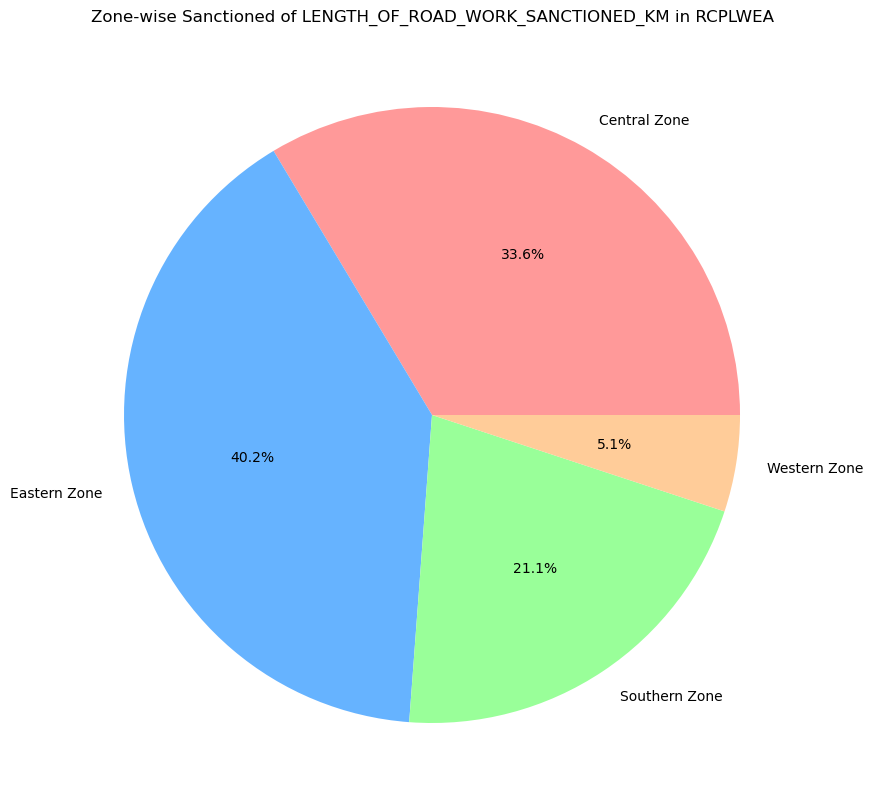

In [252]:
# Zone-wise pie chart for LENGTH_OF_ROAD_WORK_SANCTIONED_KM'

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
# ['Central Zone' 'Eastern Zone' 'North-Eastern Zone' 'Northern Zone' 'Southern Zone' 'Western Zone']

# Plotting the pie chart of the 'LENGTH_OF_ROAD_WORK_SANCTIONED_KM' grouped by 'ZONE'
plt.figure(figsize=(10, 10))
RCPLWEA_subset_pie = RCPLWEA_subset.groupby('ZONE')['LENGTH_OF_ROAD_WORK_SANCTIONED_KM'].sum().reset_index()
plt.pie(RCPLWEA_subset_pie['LENGTH_OF_ROAD_WORK_SANCTIONED_KM'], labels=RCPLWEA_subset_pie['ZONE'], autopct='%1.1f%%', colors=colors)
plt.title('Zone-wise Sanctioned of LENGTH_OF_ROAD_WORK_SANCTIONED_KM in RCPLWEA')
plt.show()

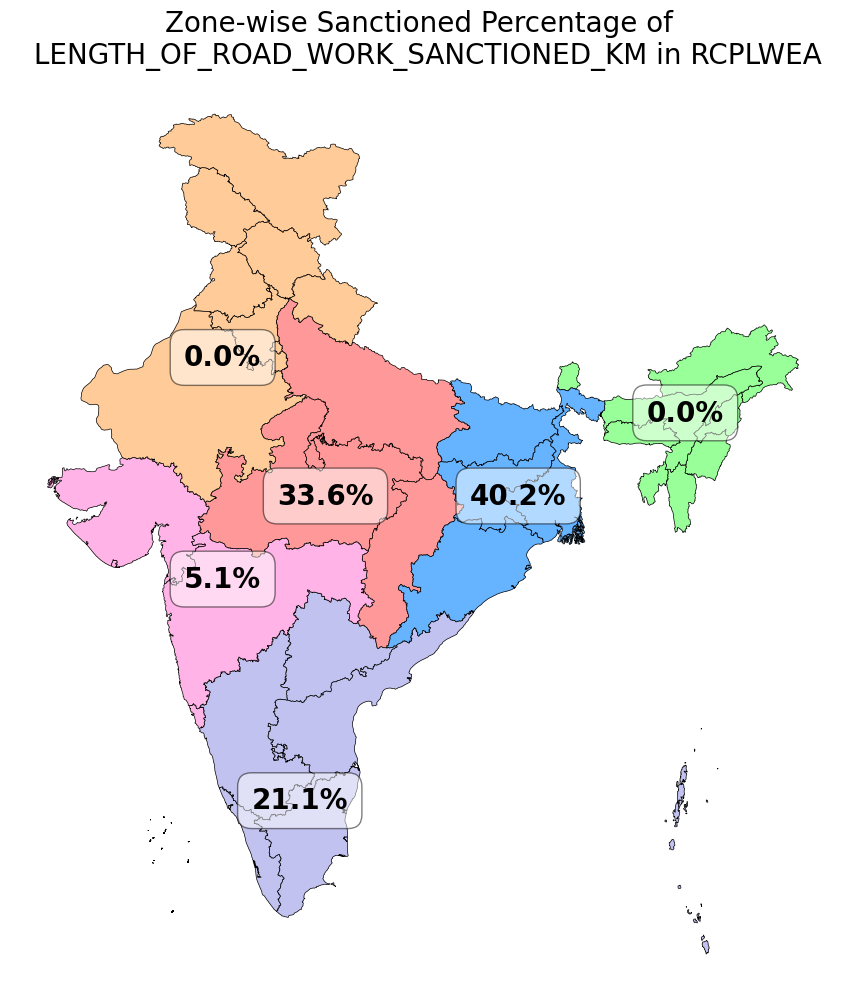

In [265]:
# Updated zone data with statistics matching the new chart
# Define the colors and zones in the correct order
colors_zones = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
zones_colors = ['Central Zone', 'Eastern Zone', 'North-Eastern Zone', 'Northern Zone', 'Southern Zone', 'Western Zone']

# Create the `zone_data` dictionary with the appropriate colors
zone_data = {
    zones_colors[i]: {"percentage": 0.0, "color": colors[i]} for i in range(len(zones_colors))
}

# Example percentages to test with actual data
zone_data['Central Zone']['percentage'] = 33.6
zone_data['Eastern Zone']['percentage'] = 40.2
zone_data['North-Eastern Zone']['percentage'] = 0.0  # Not visible
zone_data['Northern Zone']['percentage'] = 0.0  # Not visible
zone_data['Southern Zone']['percentage'] = 21.1
zone_data['Western Zone']['percentage'] = 5.1


# Zone definitions
india_zones = {
    "Northern Zone": {
        "States": ["Punjab", "Rajasthan", "Haryana", "Himachal Pradesh", "Uttaranchal"],
        "Union Territories": ["Delhi", "Ladakh", "Jammu and Kashmir", "Chandigarh"],
        "Headquarters": "Delhi"  # "New Delhi"
    },
    "Southern Zone": {
        "States": ["Andhra Pradesh", "Karnataka", "Kerala", "Tamil Nadu", "Telangana"],
        "Union Territories": ["Puducherry", "Lakshadweep", "Andaman and Nicobar"],
        "Headquarters": "Tamil Nadu"  # "Chennai"
    },
    "Eastern Zone": {
        "States": ["Bihar", "Jharkhand", "Orissa", "West Bengal"],
        "Headquarters": "West Bengal"  # "Kolkata"
    },
    "Western Zone": {
        "States": ["Goa", "Gujarat", "Maharashtra"],
        "Union Territories": ["DÄ\x81dra and Nagar Haveli and DamÄ\x81n and Diu"],
        "Headquarters": "Maharashtra"  # "Mumbai"
    },
    "Central Zone": {
        "States": ["Chhattisgarh", "Madhya Pradesh", "Uttar Pradesh", "Uttarakhand"],
        "Headquarters": "Uttar Pradesh"  # "Prayagraj"
    },
    "North-Eastern Zone": {
        "States": ["Arunachal Pradesh", "Assam", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Tripura", "Sikkim"],
        "Headquarters": "Meghalaya"  # "Shillong"
    }
}

# Load the shapefile of India's map
india_map = gpd.read_file('in_shp/in.shp')

# Create a new column 'ZONE' in the PMGSY3_subset dataframe
PMGSY3_subset['ZONE'] = np.nan

# Function to assign zone based on state or union territory
def assign_zone(name):
    for zone, regions in india_zones.items():
        if name in regions.get("States", []) or name in regions.get("Union Territories", []):
            return zone
    return None  # If the name doesn't match any zone, return None

# Apply zone classification to each state/union territory
india_map['Zone'] = india_map[name_column].apply(assign_zone)

# Assign colors based on the zone
india_map['Color'] = india_map['Zone'].map(lambda x: zone_data[x]['color'] if x in zone_data else "#d3d3d3")

# Plotting the map with data overlays
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
india_map.plot(ax=ax, color=india_map['Color'], edgecolor='black', linewidth=0.5)

# Overlay data values from the pie chart
zone_centers = {
    #(left-right, bottom-up)
    "Northern Zone": (75, 28),
    "Southern Zone": (78, 12),
    "Eastern Zone": (86.5, 23),
    "Western Zone": (75, 20),
    "Central Zone": (79, 23),
    "North-Eastern Zone": (93, 26)
}

for zone, center in zone_centers.items():
    percentage = zone_data[zone]['percentage']
    ax.text(center[0], center[1], f"{percentage}%", ha='center', fontsize=20, fontweight='bold', color='black', 
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5')) #fontbackground

plt.title("Zone-wise Sanctioned Percentage of \n LENGTH_OF_ROAD_WORK_SANCTIONED_KM in RCPLWEA", fontsize=20)
plt.axis('off')
plt.show()

### PMGSY-JANMAN Scheme

In [254]:
PMGSY_JANMAN

,STATE_NAME,DISTRICT_NAME,PMGSY_SCHEME,NO_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,NO_OF_BRIDGES_COMPLETED,NO_OF_ROAD_WORKS_BALANCE,NO_OF_BRIDGES_BALANCE,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,LENGTH_OF_ROAD_WORK_COMPLETED_KM,EXPENDITURE_OCCURED_LAKHS,LENGTH_OF_ROAD_WORK_BALANCE_KM
18,Andhra Pradesh,Nandyal,PM-JANMAN,1,0,0,0,1,0,7.110,4.40000,0.0,0.0,7.110
82,Chhattisgarh,Balrampur,PM-JANMAN,113,0,0,0,113,0,374.630,245.18930,0.0,0.0,374.630
85,Chhattisgarh,Bilaspur,PM-JANMAN,32,0,0,0,32,0,126.550,91.39231,1.2,0.0,125.350
92,Chhattisgarh,Jashpur,PM-JANMAN,80,0,0,0,80,0,281.250,214.87552,0.0,0.0,281.250
120,Gujarat,Sabarkantha,PM-JANMAN,2,0,0,0,2,0,1.550,1.24290,0.0,0.0,1.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,Madhya Pradesh,Sidhi,PM-JANMAN,44,0,0,0,44,0,145.839,106.85660,0.0,0.0,145.839
2082,Odisha,Sundargarh,PM-JANMAN,2,0,0,0,2,0,2.200,2.08580,0.0,0.0,2.200
2180,Tripura,Gomati,PM-JANMAN,19,0,0,0,19,0,26.438,27.58798,0.0,0.0,26.438
2182,Tripura,North Tripura,PM-JANMAN,8,0,0,0,8,0,35.027,32.35566,0.0,0.0,35.027


In [255]:
# Select all rows of columns ['STATE_NAME', 'DISTRICT_NAME', 'LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 'COST_OF_WORKS_SANCTIONED_LAKHS']
PMGSY_JANMAN_subset = PMGSY_JANMAN[['STATE_NAME', 'DISTRICT_NAME', 'LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 'COST_OF_WORKS_SANCTIONED_LAKHS']]
# Reset index
PMGSY_JANMAN_subset.reset_index(drop=True, inplace=True)
PMGSY_JANMAN_subset

,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS
0,Andhra Pradesh,Nandyal,7.110,4.40000
1,Chhattisgarh,Balrampur,374.630,245.18930
2,Chhattisgarh,Bilaspur,126.550,91.39231
3,Chhattisgarh,Jashpur,281.250,214.87552
4,Gujarat,Sabarkantha,1.550,1.24290
...,...,...,...,...
69,Madhya Pradesh,Sidhi,145.839,106.85660
70,Odisha,Sundargarh,2.200,2.08580
71,Tripura,Gomati,26.438,27.58798
72,Tripura,North Tripura,35.027,32.35566


In [256]:
# Combine the rows with the same distinct and state names by adding their corresponding column values
PMGSY_JANMAN_subset = PMGSY_JANMAN_subset.groupby(['STATE_NAME', 'DISTRICT_NAME']).sum().reset_index()
PMGSY_JANMAN_subset

,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS
0,Andhra Pradesh,Alluri Sitharama Raju,483.640,442.64179
1,Andhra Pradesh,Eluru,34.868,26.36000
2,Andhra Pradesh,Kakinada,19.150,16.10300
3,Andhra Pradesh,Nandyal,7.110,4.40000
4,Andhra Pradesh,Parvathipuram Manyam,38.650,39.56477
...,...,...,...,...
69,Tripura,Gomati,26.438,27.58798
70,Tripura,Khowai,3.033,2.88640
71,Tripura,North Tripura,35.027,32.35566
72,Tripura,South Tripura,3.715,3.69646


In [257]:
# Number of unique districts
PMGSY_JANMAN_subset['DISTRICT_NAME'].nunique()

74

In [258]:
# Combine the rows with the same distinct and state names by adding their corresponding column values
PMGSY_JANMAN_subset = PMGSY_JANMAN_subset.groupby(['STATE_NAME', 'DISTRICT_NAME']).sum().reset_index()
PMGSY_JANMAN_subset

,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS
0,Andhra Pradesh,Alluri Sitharama Raju,483.640,442.64179
1,Andhra Pradesh,Eluru,34.868,26.36000
2,Andhra Pradesh,Kakinada,19.150,16.10300
3,Andhra Pradesh,Nandyal,7.110,4.40000
4,Andhra Pradesh,Parvathipuram Manyam,38.650,39.56477
...,...,...,...,...
69,Tripura,Gomati,26.438,27.58798
70,Tripura,Khowai,3.033,2.88640
71,Tripura,North Tripura,35.027,32.35566
72,Tripura,South Tripura,3.715,3.69646


### Zonewise

In [259]:
india_zones = {
    "Northern Zone": {
        "States": ["Punjab", "Rajasthan", "Haryana", "Himachal Pradesh", "Uttaranchal"],
        "Union Territories": ["Delhi", "Ladakh", "Jammu And Kashmir", "Chandigarh"],
        "Headquarters": "Delhi"  # "New Delhi"
    },
    "Southern Zone": {
        "States": ["Andhra Pradesh", "Karnataka", "Kerala", "Tamil Nadu", "Telangana"],
        "Union Territories": ["Puducherry", "Lakshadweep", "Andaman And Nicobar"],
        "Headquarters": "Tamil Nadu"  # "Chennai"
    },
    "Eastern Zone": {
        "States": ["Bihar", "Jharkhand", "Odisha", "West Bengal"],
        "Headquarters": "West Bengal"  # "Kolkata"
    },
    "Western Zone": {
        "States": ["Goa", "Gujarat", "Maharashtra"],
        "Union Territories": ["DÄ\x81dra and Nagar Haveli and DamÄ\x81n and Diu"],
        "Headquarters": "Maharashtra"  # "Mumbai"
    },
    "Central Zone": {
        "States": ["Chhattisgarh", "Madhya Pradesh", "Uttar Pradesh", "Uttarakhand"],
        "Headquarters": "Uttar Pradesh"  # "Prayagraj"
    },
    "North-Eastern Zone": {
        "States": ["Arunachal Pradesh", "Assam", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Tripura", "Sikkim"],
        "Headquarters": "Meghalaya"  # "Shillong"
    }
}

In [260]:
# Create a new column 'ZONE' in the RCPLWEA_subset dataframe
PMGSY_JANMAN_subset['ZONE'] = np.nan
PMGSY_JANMAN_subset['ZONE'] = PMGSY_JANMAN_subset['ZONE'].astype('object')

# Apply zone classification to each state/union territory
for zone, states in india_zones.items():
    PMGSY_JANMAN_subset.loc[PMGSY_JANMAN_subset['STATE_NAME'].str.upper().isin([state.upper() for state in states['States']]), 'ZONE'] =  zone

# For Nan rows of zone, check for the State names in the Union Territories
for zone, states in india_zones.items():
    if 'Union Territories' in states:
        PMGSY_JANMAN_subset.loc[PMGSY_JANMAN_subset['STATE_NAME'].str.upper().isin([state.upper() for state in states['Union Territories']]), 'ZONE'] = zone

PMGSY_JANMAN_subset

,STATE_NAME,DISTRICT_NAME,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,ZONE
0,Andhra Pradesh,Alluri Sitharama Raju,483.640,442.64179,Southern Zone
1,Andhra Pradesh,Eluru,34.868,26.36000,Southern Zone
2,Andhra Pradesh,Kakinada,19.150,16.10300,Southern Zone
3,Andhra Pradesh,Nandyal,7.110,4.40000,Southern Zone
4,Andhra Pradesh,Parvathipuram Manyam,38.650,39.56477,Southern Zone
...,...,...,...,...,...
69,Tripura,Gomati,26.438,27.58798,North-Eastern Zone
70,Tripura,Khowai,3.033,2.88640,North-Eastern Zone
71,Tripura,North Tripura,35.027,32.35566,North-Eastern Zone
72,Tripura,South Tripura,3.715,3.69646,North-Eastern Zone


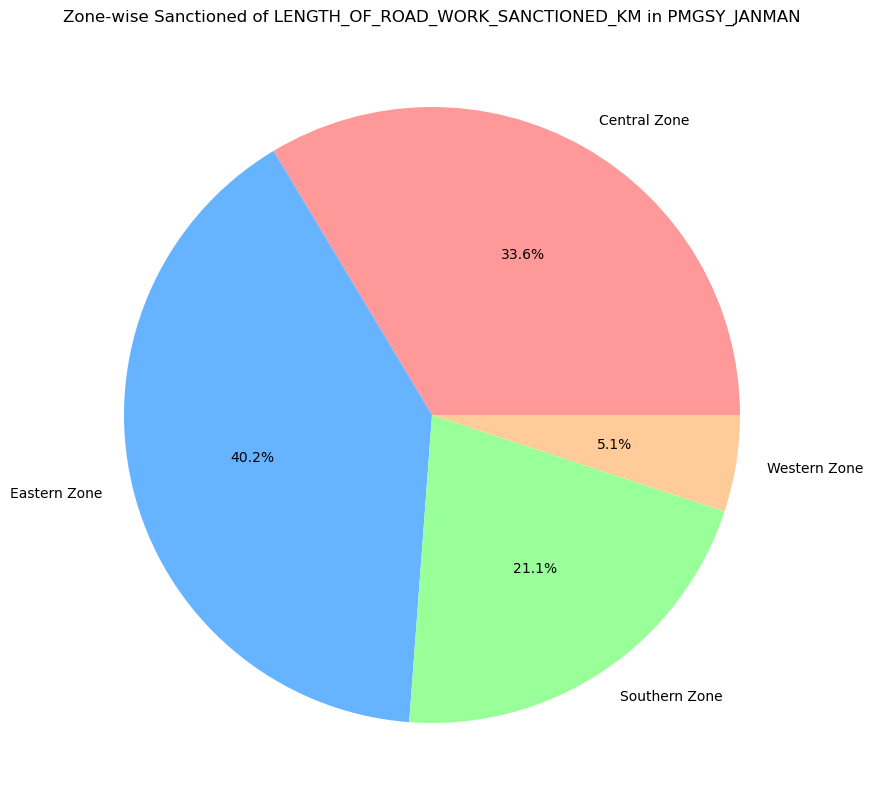

In [261]:
# Zone-wise pie chart for LENGTH_OF_ROAD_WORK_SANCTIONED_KM'

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
# ['Central Zone' 'Eastern Zone' 'North-Eastern Zone' 'Northern Zone' 'Southern Zone' 'Western Zone']

# Plotting the pie chart of the 'LENGTH_OF_ROAD_WORK_SANCTIONED_KM' grouped by 'ZONE'
plt.figure(figsize=(10, 10))
RCPLWEA_subset_pie = RCPLWEA_subset.groupby('ZONE')['LENGTH_OF_ROAD_WORK_SANCTIONED_KM'].sum().reset_index()
plt.pie(RCPLWEA_subset_pie['LENGTH_OF_ROAD_WORK_SANCTIONED_KM'], labels=RCPLWEA_subset_pie['ZONE'], autopct='%1.1f%%', colors=colors)
plt.title('Zone-wise Sanctioned of LENGTH_OF_ROAD_WORK_SANCTIONED_KM in PMGSY_JANMAN')
plt.show()

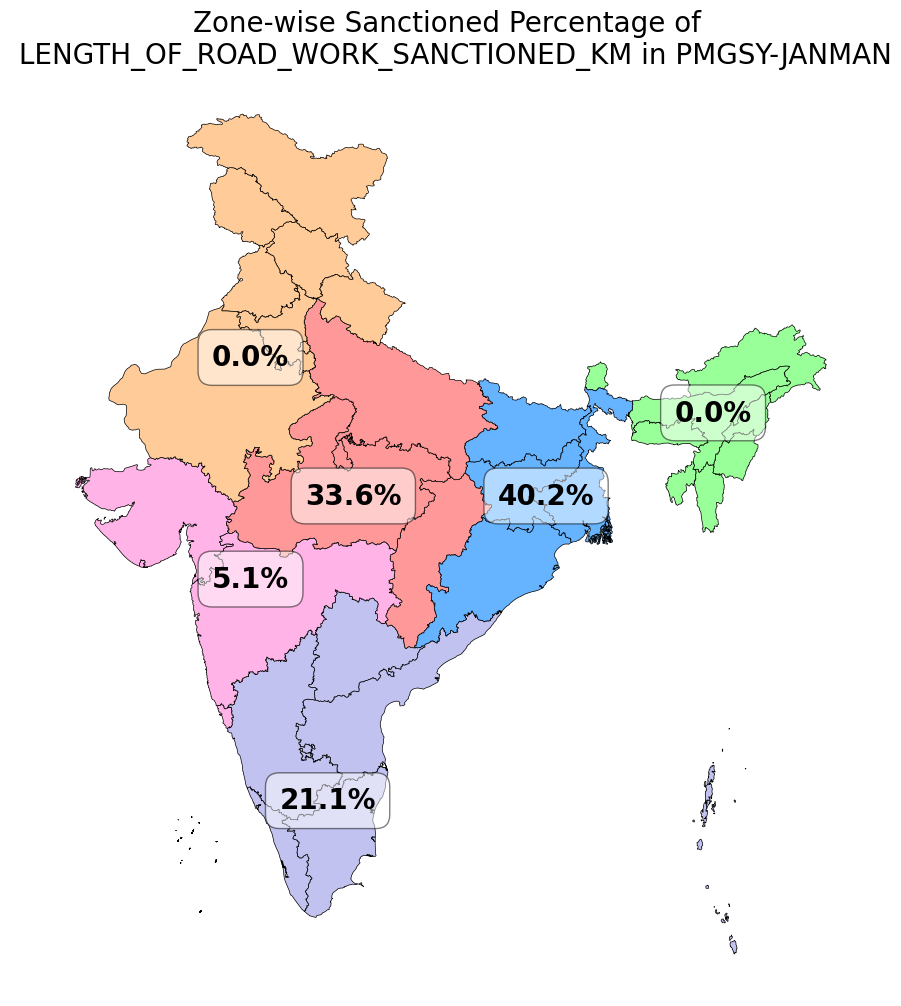

In [264]:
# Updated zone data with statistics matching the new chart
# Define the colors and zones in the correct order
colors_zones = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
zones_colors = ['Central Zone', 'Eastern Zone', 'North-Eastern Zone', 'Northern Zone', 'Southern Zone', 'Western Zone']

# Create the `zone_data` dictionary with the appropriate colors
zone_data = {
    zones_colors[i]: {"percentage": 0.0, "color": colors[i]} for i in range(len(zones_colors))
}

# Example percentages to test with actual data
zone_data['Central Zone']['percentage'] = 33.6
zone_data['Eastern Zone']['percentage'] = 40.2
zone_data['North-Eastern Zone']['percentage'] = 0.0  # Not visible
zone_data['Northern Zone']['percentage'] = 0.0  # Not visible
zone_data['Southern Zone']['percentage'] = 21.1
zone_data['Western Zone']['percentage'] = 5.1


# Zone definitions
india_zones = {
    "Northern Zone": {
        "States": ["Punjab", "Rajasthan", "Haryana", "Himachal Pradesh", "Uttaranchal"],
        "Union Territories": ["Delhi", "Ladakh", "Jammu and Kashmir", "Chandigarh"],
        "Headquarters": "Delhi"  # "New Delhi"
    },
    "Southern Zone": {
        "States": ["Andhra Pradesh", "Karnataka", "Kerala", "Tamil Nadu", "Telangana"],
        "Union Territories": ["Puducherry", "Lakshadweep", "Andaman and Nicobar"],
        "Headquarters": "Tamil Nadu"  # "Chennai"
    },
    "Eastern Zone": {
        "States": ["Bihar", "Jharkhand", "Orissa", "West Bengal"],
        "Headquarters": "West Bengal"  # "Kolkata"
    },
    "Western Zone": {
        "States": ["Goa", "Gujarat", "Maharashtra"],
        "Union Territories": ["DÄ\x81dra and Nagar Haveli and DamÄ\x81n and Diu"],
        "Headquarters": "Maharashtra"  # "Mumbai"
    },
    "Central Zone": {
        "States": ["Chhattisgarh", "Madhya Pradesh", "Uttar Pradesh", "Uttarakhand"],
        "Headquarters": "Uttar Pradesh"  # "Prayagraj"
    },
    "North-Eastern Zone": {
        "States": ["Arunachal Pradesh", "Assam", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Tripura", "Sikkim"],
        "Headquarters": "Meghalaya"  # "Shillong"
    }
}

# Load the shapefile of India's map
india_map = gpd.read_file('in_shp/in.shp')

# Create a new column 'ZONE' in the PMGSY3_subset dataframe
PMGSY3_subset['ZONE'] = np.nan

# Function to assign zone based on state or union territory
def assign_zone(name):
    for zone, regions in india_zones.items():
        if name in regions.get("States", []) or name in regions.get("Union Territories", []):
            return zone
    return None  # If the name doesn't match any zone, return None

# Apply zone classification to each state/union territory
india_map['Zone'] = india_map[name_column].apply(assign_zone)

# Assign colors based on the zone
india_map['Color'] = india_map['Zone'].map(lambda x: zone_data[x]['color'] if x in zone_data else "#d3d3d3")

# Plotting the map with data overlays
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
india_map.plot(ax=ax, color=india_map['Color'], edgecolor='black', linewidth=0.5)

# Overlay data values from the pie chart
zone_centers = {
    #(left-right, bottom-up)
    "Northern Zone": (75, 28),
    "Southern Zone": (78, 12),
    "Eastern Zone": (86.5, 23),
    "Western Zone": (75, 20),
    "Central Zone": (79, 23),
    "North-Eastern Zone": (93, 26)
}

for zone, center in zone_centers.items():
    percentage = zone_data[zone]['percentage']
    ax.text(center[0], center[1], f"{percentage}%", ha='center', fontsize=20, fontweight='bold', color='black', 
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5')) #fontbackground

plt.title("Zone-wise Sanctioned Percentage of \n LENGTH_OF_ROAD_WORK_SANCTIONED_KM in PMGSY-JANMAN", fontsize=20)
plt.axis('off')
plt.show()

## TB_Lab

In [63]:
TB_Lab

,State/UT,Unnamed: 1,Name of the Culture & DST Laboratory,Liquid culture,FL LCDST,SL LCDST,FL LPA,SL LPA
0,Andhra Pradesh,Public,"IRL, Visakhaptnam",Available,Certified,Certified,Certified,Certified
1,Andhra Pradesh,Public,"C&DST Laboratory, SMC, Vijayawada",Available,Not Certified,Not Certified,Not Certified,Not Certified
2,Andhra Pradesh,Public,"C&DST Laboratory, DTRC(DFIT),Nellore,A.P",Not Available,Not Certified,Not Certified,Certified,Certified
3,Andhra Pradesh,Public,"C&DST Laboratory, RDT Hospital, Bathalapalli",Available,Certified,Not Certified,Certified,Certified
4,Assam,Public,IRL Guwahati,Available,Certified,Certified,Certified,Certified
...,...,...,...,...,...,...,...,...
92,Tamil Nadu,Private,"Vision Research Fondation laboratory, Shakar N...",Available,Certified,Not Certified,Not Certified,Not Certified
93,Uttar Pradesh,Private,"Subharti Medical College, Meerut",Not Available,Not Certified,Not Certified,Certified,Not Certified
94,Uttar Pradesh,Private,"Shri Ram Murti Smarak Institutions, Bareilly",Available,Not Certified,Not Certified,Not Certified,Not Certified
95,West Bengal,Private,"SRL Diagnsotics, Kolkata",Available,Certified,Not Certified,Not Certified,Not Certified


In [64]:
TB_Lab.columns

Index(['State/UT', 'Unnamed: 1', 'Name of the Culture & DST Laboratory',
       'Liquid culture', 'FL LCDST', 'SL LCDST', 'FL LPA', 'SL LPA'],
      dtype='object')

In [65]:
TB_Lab_subset = TB_Lab[['State/UT', 'Unnamed: 1', 'Liquid culture', 'FL LCDST', 'SL LCDST', 'FL LPA', 'SL LPA']].copy()
# Rename 'Unnamed: 1' to 'Public/Private'
TB_Lab_subset.rename(columns={'Unnamed: 1': 'Public/Private'}, inplace=True)
TB_Lab_subset

,State/UT,Public/Private,Liquid culture,FL LCDST,SL LCDST,FL LPA,SL LPA
0,Andhra Pradesh,Public,Available,Certified,Certified,Certified,Certified
1,Andhra Pradesh,Public,Available,Not Certified,Not Certified,Not Certified,Not Certified
2,Andhra Pradesh,Public,Not Available,Not Certified,Not Certified,Certified,Certified
3,Andhra Pradesh,Public,Available,Certified,Not Certified,Certified,Certified
4,Assam,Public,Available,Certified,Certified,Certified,Certified
...,...,...,...,...,...,...,...
92,Tamil Nadu,Private,Available,Certified,Not Certified,Not Certified,Not Certified
93,Uttar Pradesh,Private,Not Available,Not Certified,Not Certified,Certified,Not Certified
94,Uttar Pradesh,Private,Available,Not Certified,Not Certified,Not Certified,Not Certified
95,West Bengal,Private,Available,Certified,Not Certified,Not Certified,Not Certified


In [66]:
# Convert the TB_Lab_subset to numerical
TB_Lab_subset['Public/Private'] = TB_Lab_subset['Public/Private'].apply(lambda x: 1 if x == 'Public' else 0)
TB_Lab_subset['Liquid culture'] = TB_Lab_subset['Liquid culture'].apply(lambda x: 1 if x == 'Available' else 0)
TB_Lab_subset['FL LCDST'] = TB_Lab_subset['FL LCDST'].apply(lambda x: 1 if x == 'Certified' else 0)
TB_Lab_subset['SL LCDST'] = TB_Lab_subset['SL LCDST'].apply(lambda x: 1 if x == 'Certified' else 0)
TB_Lab_subset['FL LPA'] = TB_Lab_subset['FL LPA'].apply(lambda x: 1 if x == 'Certified' else 0)
TB_Lab_subset['SL LPA'] = TB_Lab_subset['SL LPA'].apply(lambda x: 1 if x == 'Certified' else 0)

TB_Lab_subset

,State/UT,Public/Private,Liquid culture,FL LCDST,SL LCDST,FL LPA,SL LPA
0,Andhra Pradesh,1,1,1,1,1,1
1,Andhra Pradesh,1,1,0,0,0,0
2,Andhra Pradesh,1,0,0,0,1,1
3,Andhra Pradesh,1,1,1,0,1,1
4,Assam,1,1,1,1,1,1
...,...,...,...,...,...,...,...
92,Tamil Nadu,0,1,1,0,0,0
93,Uttar Pradesh,0,0,0,0,1,0
94,Uttar Pradesh,0,1,0,0,0,0
95,West Bengal,0,1,1,0,0,0


In [67]:
# Combine the rows of all the columns based on the State/UT values
TB_Lab_subset = TB_Lab_subset.groupby('State/UT').sum().reset_index()
TB_Lab_subset

,State/UT,Public/Private,Liquid culture,FL LCDST,SL LCDST,FL LPA,SL LPA
0,Andhra Pradesh,4,3,2,1,3,3
1,Assam,1,1,1,1,1,1
2,Bihar,4,4,3,2,3,3
3,Chandigarh,1,1,1,1,1,1
4,Chhattisgarh,2,1,1,1,2,2
5,Delhi,4,4,4,3,3,3
6,Goa,1,1,1,1,1,1
7,Gujarat,3,3,3,3,4,2
8,Haryana,2,2,0,0,2,2
9,Himachal Pradesh,2,1,0,0,1,1


# Combining all the datasets together

Assumption: For the numerical values, if the dataset is at the state-level, then we divide the value equally among the state districts. While for the categorical values, we allocate same class for all the districts of that state.

In [68]:
import pandas as pd

def combine_datasets(table1: pd.DataFrame, table2: pd.DataFrame):
    unmatched_combinations = set()

    # Scenario 1: Both 'state_name' and 'district_name' are present in table2
    if 'state_name' in table2.columns and 'district_name' in table2.columns:
        for _, row in table2.iterrows():
            state_name, district_name = row['state_name'], row['district_name']
            match = table1[(table1['state_name'] == state_name) & (table1['district_name'] == district_name)]

            if not match.empty:
                # Update the matched row in table1
                for col in table2.columns:
                    if col not in ['state_name', 'district_name']:
                        table1.loc[match.index, col] = row[col]
            else:
                # Add to unmatched combinations and append the row to table1
                unmatched_combinations.add((state_name, district_name))
                table1 = pd.concat([table1, pd.DataFrame([row])], ignore_index=True)

        # Sort table1 by 'state_name' and 'district_name'
        table1 = table1.sort_values(by=['state_name', 'district_name']).reset_index(drop=True)
        return table1, unmatched_combinations

    # Scenario 2: Only 'state_name' is present in table2
    elif 'state_name' in table2.columns:
        updated_table2 = table1.copy()
        for _, row in table2.iterrows():
            state_name = row['state_name']
            state_districts = table1[table1['state_name'] == state_name]

            if not state_districts.empty:
                for col in table2.columns:
                    if col != 'state_name':
                        if pd.api.types.is_numeric_dtype(table2[col]):  # Check column dtype in table2, not row
                            # Divide numerical feature among districts
                            divided_value = row[col] / len(state_districts)
                            updated_table2.loc[state_districts.index, col] = divided_value
                        else:
                            # Copy categorical value to all districts
                            updated_table2.loc[state_districts.index, col] = row[col]
            else:
                # Add to unmatched state_names and append the row to table2
                unmatched_combinations.add(state_name)
                updated_table2 = pd.concat([updated_table2, pd.DataFrame([row])], ignore_index=True)

        # Sort updated_table2 by 'state_name' and 'district_name'
        updated_table2 = updated_table2.sort_values(by=['state_name', 'district_name']).reset_index(drop=True)
        return updated_table2, unmatched_combinations

    else:
        raise ValueError("The required columns are not present in table2.")

In [69]:
# rename column 'total_beneficiaries' to 'total_beneficiaries_<scheme_name>'
IGNOAPS_subset = IGNOAPS_subset.rename(columns={'total_beneficiaries': 'total_beneficiaries_IGNOAPS'})
IGNDPS_subset.rename(columns={'total_beneficiaries': 'total_beneficiaries_IGNDPS'}, inplace=True)
IGNWPS_subset.rename(columns={'total_beneficiaries': 'total_beneficiaries_IGNWPS'}, inplace=True)

dataset = IGNOAPS_subset.copy()
dataset

,state_name,district_name,total_beneficiaries_IGNOAPS
0,ANDAMAN AND NICOBAR,NICOBARS,9404
1,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,13874
2,ANDAMAN AND NICOBAR,SOUTH ANDAMANS,14181
3,ANDHRA PRADESH,ANANTAPUR,2659988
4,ANDHRA PRADESH,Alluri Sitharama Raju,165552
...,...,...,...
728,WEST BENGAL,PASCHIM BURDWAN,104736
729,WEST BENGAL,PASCHIM MEDINIPUR,1079448
730,WEST BENGAL,PURBA BURDWAN,1224987
731,WEST BENGAL,PURBA MEDINIPUR,892569


In [70]:
combined_dataset, unmatched_combinations = combine_datasets(dataset, IGNDPS_subset)
print('Unmatched Combinations:', unmatched_combinations)
combined_dataset

Unmatched Combinations: set()


,state_name,district_name,total_beneficiaries_IGNOAPS,total_beneficiaries_IGNDPS
0,ANDAMAN AND NICOBAR,NICOBARS,9404,150.0
1,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,13874,1780.0
2,ANDAMAN AND NICOBAR,SOUTH ANDAMANS,14181,766.0
3,ANDHRA PRADESH,ANANTAPUR,2659988,88709.0
4,ANDHRA PRADESH,Alluri Sitharama Raju,165552,NaN
...,...,...,...,...
728,WEST BENGAL,PASCHIM BURDWAN,104736,1061.0
729,WEST BENGAL,PASCHIM MEDINIPUR,1079448,60250.0
730,WEST BENGAL,PURBA BURDWAN,1224987,49714.0
731,WEST BENGAL,PURBA MEDINIPUR,892569,72783.0


In [71]:
# Replace missing values with 0
combined_dataset.fillna(0, inplace=True)
combined_dataset

,state_name,district_name,total_beneficiaries_IGNOAPS,total_beneficiaries_IGNDPS
0,ANDAMAN AND NICOBAR,NICOBARS,9404,150.0
1,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,13874,1780.0
2,ANDAMAN AND NICOBAR,SOUTH ANDAMANS,14181,766.0
3,ANDHRA PRADESH,ANANTAPUR,2659988,88709.0
4,ANDHRA PRADESH,Alluri Sitharama Raju,165552,0.0
...,...,...,...,...
728,WEST BENGAL,PASCHIM BURDWAN,104736,1061.0
729,WEST BENGAL,PASCHIM MEDINIPUR,1079448,60250.0
730,WEST BENGAL,PURBA BURDWAN,1224987,49714.0
731,WEST BENGAL,PURBA MEDINIPUR,892569,72783.0


In [72]:
combine_dataset, unmatched_combinations = combine_datasets(combined_dataset, IGNWPS_subset)
print('Unmatched Combinations:', unmatched_combinations)
combine_dataset

Unmatched Combinations: set()


,state_name,district_name,total_beneficiaries_IGNOAPS,total_beneficiaries_IGNDPS,total_beneficiaries_IGNWPS
0,ANDAMAN AND NICOBAR,NICOBARS,9404,150.0,2290.0
1,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,13874,1780.0,3660.0
2,ANDAMAN AND NICOBAR,SOUTH ANDAMANS,14181,766.0,2014.0
3,ANDHRA PRADESH,ANANTAPUR,2659988,88709.0,799621.0
4,ANDHRA PRADESH,Alluri Sitharama Raju,165552,0.0,79096.0
...,...,...,...,...,...
728,WEST BENGAL,PASCHIM BURDWAN,104736,1061.0,139257.0
729,WEST BENGAL,PASCHIM MEDINIPUR,1079448,60250.0,838762.0
730,WEST BENGAL,PURBA BURDWAN,1224987,49714.0,1165481.0
731,WEST BENGAL,PURBA MEDINIPUR,892569,72783.0,580736.0


In [73]:
# Replace missing values with 0
combine_dataset.fillna(0, inplace=True)
combine_dataset

,state_name,district_name,total_beneficiaries_IGNOAPS,total_beneficiaries_IGNDPS,total_beneficiaries_IGNWPS
0,ANDAMAN AND NICOBAR,NICOBARS,9404,150.0,2290.0
1,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,13874,1780.0,3660.0
2,ANDAMAN AND NICOBAR,SOUTH ANDAMANS,14181,766.0,2014.0
3,ANDHRA PRADESH,ANANTAPUR,2659988,88709.0,799621.0
4,ANDHRA PRADESH,Alluri Sitharama Raju,165552,0.0,79096.0
...,...,...,...,...,...
728,WEST BENGAL,PASCHIM BURDWAN,104736,1061.0,139257.0
729,WEST BENGAL,PASCHIM MEDINIPUR,1079448,60250.0,838762.0
730,WEST BENGAL,PURBA BURDWAN,1224987,49714.0,1165481.0
731,WEST BENGAL,PURBA MEDINIPUR,892569,72783.0,580736.0


In [74]:
combined_dataset, unmatched_combinations = combine_datasets(combined_dataset, DHIS_subset)
print('Unmatched Combinations:', unmatched_combinations)
combined_dataset

Unmatched Combinations: set()


,state_name,district_name,total_beneficiaries_IGNOAPS,total_beneficiaries_IGNDPS,total_beneficiaries_IGNWPS,Funds_Released_DHBS
0,ANDAMAN AND NICOBAR,NICOBARS,9404,150.0,2290.0,NaN
1,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,13874,1780.0,3660.0,NaN
2,ANDAMAN AND NICOBAR,SOUTH ANDAMANS,14181,766.0,2014.0,NaN
3,ANDHRA PRADESH,ANANTAPUR,2659988,88709.0,799621.0,0.187200
4,ANDHRA PRADESH,Alluri Sitharama Raju,165552,0.0,79096.0,0.187200
...,...,...,...,...,...,...
728,WEST BENGAL,PASCHIM BURDWAN,104736,1061.0,139257.0,0.008261
729,WEST BENGAL,PASCHIM MEDINIPUR,1079448,60250.0,838762.0,0.008261
730,WEST BENGAL,PURBA BURDWAN,1224987,49714.0,1165481.0,0.008261
731,WEST BENGAL,PURBA MEDINIPUR,892569,72783.0,580736.0,0.008261


In [75]:
# Replace the missing values with 0
combined_dataset.fillna(0, inplace=True)
combined_dataset

,state_name,district_name,total_beneficiaries_IGNOAPS,total_beneficiaries_IGNDPS,total_beneficiaries_IGNWPS,Funds_Released_DHBS
0,ANDAMAN AND NICOBAR,NICOBARS,9404,150.0,2290.0,0.000000
1,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,13874,1780.0,3660.0,0.000000
2,ANDAMAN AND NICOBAR,SOUTH ANDAMANS,14181,766.0,2014.0,0.000000
3,ANDHRA PRADESH,ANANTAPUR,2659988,88709.0,799621.0,0.187200
4,ANDHRA PRADESH,Alluri Sitharama Raju,165552,0.0,79096.0,0.187200
...,...,...,...,...,...,...
728,WEST BENGAL,PASCHIM BURDWAN,104736,1061.0,139257.0,0.008261
729,WEST BENGAL,PASCHIM MEDINIPUR,1079448,60250.0,838762.0,0.008261
730,WEST BENGAL,PURBA BURDWAN,1224987,49714.0,1165481.0,0.008261
731,WEST BENGAL,PURBA MEDINIPUR,892569,72783.0,580736.0,0.008261


# stopped here; check for data errors

In [256]:
combined_dataset, unmatched_combinations = combine_datasets(combined_dataset, bharatnet_subset)
print('Unmatched Combinations:', unmatched_combinations)
print('Number of Combinations:', len(unmatched_combinations))
combined_dataset

Unmatched Combinations: {('ODISHA', 'ANUGUL'), ('JHARKHAND', 'HAZARIBAGH'), ('TELANGANA', 'YADADRI BHUVANAGIRI'), ('WEST BENGAL', 'MEDINIPUR EAST'), ('KARNATAKA', 'SHIVAMOGGA'), ('JAMMU AND KASHMIR', 'BUDGAM'), ('TAMIL NADU', 'RANIPET'), ('TAMIL NADU', 'SIVAGANGA'), ('TELANGANA', 'WARANGAL URBAN'), ('PUNJAB', 'S.A.S NAGAR'), ('MANIPUR', 'KAMJONG'), ('JAMMU AND KASHMIR', 'RAJOURI'), ('ODISHA', 'NABARANGPUR'), ('UTTAR PRADESH', 'BHADOHI'), ('ASSAM', 'SOUTH SALMARA-MANKACHAR'), ('TAMIL NADU', 'TENKASI'), ('GUJARAT', 'DOHAD'), ('JAMMU AND KASHMIR', 'GANDERBAL'), ('KARNATAKA', 'CHIKKAMAGALURU'), ('MANIPUR', 'NONEY'), ('ODISHA', 'BALANGIR'), ('TAMIL NADU', 'THIRUVALLUR'), ('MANIPUR', 'TENGNOUPAL'), ('KARNATAKA', 'VIJAYAPURA'), ('TELANGANA', 'WARANGAL RURAL'), ('MAHARASHTRA', 'AURANAGABAD'), ('MANIPUR', 'JIRIBAM'), ('KARNATAKA', 'BELAGAVI'), ('TAMIL NADU', 'TIRUCHIRAPPALLI'), ('TELANGANA', 'KUMURAM BHEEM ASIFABAD'), ('HARYANA', 'NUH'), ('UTTAR PRADESH', 'AMROHA'), ('UTTAR PRADESH', 'SAMBHAL')

,state_name,district_name,total_beneficiaries_IGNOAPS,total_beneficiaries_IGNDPS,total_beneficiaries_IGNWPS,Funds_Released_DHBS,Percentage_Service_Ready_Gram_Panchayats
0,ANDAMAN AND NICOBAR,NICOBARS,9404.0,150.0,2290.0,0.000000,87.500000
1,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,13874.0,1780.0,3660.0,0.000000,100.000000
2,ANDAMAN AND NICOBAR,SOUTH ANDAMANS,14181.0,766.0,2014.0,0.000000,100.000000
3,ANDHRA PRADESH,ANANTAPUR,2659988.0,88709.0,799621.0,0.187200,95.402299
4,ANDHRA PRADESH,Alluri Sitharama Raju,165552.0,0.0,79096.0,0.187200,NaN
...,...,...,...,...,...,...,...
804,WEST BENGAL,PASCHIM MEDINIPUR,1079448.0,60250.0,838762.0,0.008261,NaN
805,WEST BENGAL,PURBA BARDHAMAN,NaN,NaN,NaN,NaN,67.906977
806,WEST BENGAL,PURBA BURDWAN,1224987.0,49714.0,1165481.0,0.008261,NaN
807,WEST BENGAL,PURBA MEDINIPUR,892569.0,72783.0,580736.0,0.008261,NaN


In [257]:
combined_dataset, unmatched_combinations = combine_datasets(combined_dataset, active_companies_subset)
print('Unmatched Combinations:', unmatched_combinations)
print('Number of Combinations:', len(unmatched_combinations))
combined_dataset

Unmatched Combinations: {'THE DADRA & NAGAR HAVELI AND DAMAN AND DIU', 'DADAR NAGAR HAVELI'}
Number of Combinations: 2


,state_name,district_name,total_beneficiaries_IGNOAPS,total_beneficiaries_IGNDPS,total_beneficiaries_IGNWPS,Funds_Released_DHBS,Percentage_Service_Ready_Gram_Panchayats,No. of Companies - Public,AuthorizedCapital_Public (In Crores),No. of Companies - Private,AuthorizedCapital_Private (In Crores)
0,ANDAMAN AND NICOBAR,NICOBARS,9404.0,150.0,2290.0,0.000000,87.500000,0.666667,0.666667,0.333333,16.666667
1,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,13874.0,1780.0,3660.0,0.000000,100.000000,0.666667,0.666667,0.333333,16.666667
2,ANDAMAN AND NICOBAR,SOUTH ANDAMANS,14181.0,766.0,2014.0,0.000000,100.000000,0.666667,0.666667,0.333333,16.666667
3,ANDHRA PRADESH,ANANTAPUR,2659988.0,88709.0,799621.0,0.187200,95.402299,1.961538,606.567308,1.384615,43.691923
4,ANDHRA PRADESH,Alluri Sitharama Raju,165552.0,0.0,79096.0,0.187200,NaN,1.961538,606.567308,1.384615,43.691923
...,...,...,...,...,...,...,...,...,...,...,...
806,WEST BENGAL,PASCHIM MEDINIPUR,1079448.0,60250.0,838762.0,0.008261,NaN,2.518519,1945.581481,1.259259,328.139630
807,WEST BENGAL,PURBA BARDHAMAN,NaN,NaN,NaN,NaN,67.906977,2.518519,1945.581481,1.259259,328.139630
808,WEST BENGAL,PURBA BURDWAN,1224987.0,49714.0,1165481.0,0.008261,NaN,2.518519,1945.581481,1.259259,328.139630
809,WEST BENGAL,PURBA MEDINIPUR,892569.0,72783.0,580736.0,0.008261,NaN,2.518519,1945.581481,1.259259,328.139630


# Give the Zones classification

In [285]:
india_zones = {
    "Northern Zone": {
        "States": ["Haryana", "Himachal Pradesh", "Punjab", "Rajasthan", "Uttarakhand", "Uttar Pradesh"],
        "Union Territories": ["Delhi", "Ladakh", "Jammu And Kashmir", "Chandigarh"]
    },
    "Southern Zone": {
        "States": ["Andhra Pradesh", "Karnataka", "Kerala", "Tamil Nadu", "Telangana"],
        "Union Territories": ["Puducherry", "Lakshadweep", "Andaman And Nicobar"]
    },
    "Eastern Zone": {
        "States": ["Bihar", "Jharkhand", "Odisha", "West Bengal"]
    },
    "Western Zone": {
        "States": ["Goa", "Gujarat", "Maharashtra"],
        "Union Territories": ["The Dadra and Nagar Haveli and Daman and Diu"]
    },
    "Central Zone": {
        "States": ["Chhattisgarh", "Madhya Pradesh"]
    },
    "North-Eastern Zone": {
        "States": ["Arunachal Pradesh", "Assam", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Tripura", "Sikkim"]
    }
}



# Accessing the zones
for zone, divisions in india_zones.items():
    print(f"{zone}:")
    for division, places in divisions.items():
        print(f"  {division}: {', '.join(places)}")
    print()

Northern Zone:
  States: Haryana, Himachal Pradesh, Punjab, Rajasthan, Uttarakhand, Uttar Pradesh
  Union Territories: Delhi, Ladakh, Jammu And Kashmir, Chandigarh

Southern Zone:
  States: Andhra Pradesh, Karnataka, Kerala, Tamil Nadu, Telangana
  Union Territories: Puducherry, Lakshadweep, Andaman And Nicobar

Eastern Zone:
  States: Bihar, Jharkhand, Odisha, West Bengal

Western Zone:
  States: Goa, Gujarat, Maharashtra
  Union Territories: The Dadra and Nagar Haveli and Daman and Diu

Central Zone:
  States: Chhattisgarh, Madhya Pradesh

North-Eastern Zone:
  States: Arunachal Pradesh, Assam, Manipur, Meghalaya, Mizoram, Nagaland, Tripura, Sikkim



In [275]:
combined_dataset

,state_name,district_name,total_beneficiaries_IGNOAPS,total_beneficiaries_IGNDPS,total_beneficiaries_IGNWPS,Funds_Released_DHBS
0,ANDAMAN AND NICOBAR,NICOBARS,9404,150.0,2290.0,0.000000
1,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,13874,1780.0,3660.0,0.000000
2,ANDAMAN AND NICOBAR,SOUTH ANDAMANS,14181,766.0,2014.0,0.000000
3,ANDHRA PRADESH,ANANTAPUR,2659988,88709.0,799621.0,0.187200
4,ANDHRA PRADESH,Alluri Sitharama Raju,165552,0.0,79096.0,0.187200
...,...,...,...,...,...,...
728,WEST BENGAL,PASCHIM BURDWAN,104736,1061.0,139257.0,0.008261
729,WEST BENGAL,PASCHIM MEDINIPUR,1079448,60250.0,838762.0,0.008261
730,WEST BENGAL,PURBA BURDWAN,1224987,49714.0,1165481.0,0.008261
731,WEST BENGAL,PURBA MEDINIPUR,892569,72783.0,580736.0,0.008261


In [290]:
# Create a new column where you assign each row a zone name based on the 'state_name' column
# Note that the 'state_name' column has all values as uppercase
def assign_zone(state_name):
    state_name = state_name.lower()
    for zone, divisions in india_zones.items():
        for division, places in divisions.items():
            # convert places to lower case
            places = [place.lower() for place in places]
            if state_name in places:
                return zone

combined_dataset['Zone'] = combined_dataset['state_name'].apply(assign_zone)
combined_dataset

,state_name,district_name,total_beneficiaries_IGNOAPS,total_beneficiaries_IGNDPS,total_beneficiaries_IGNWPS,Funds_Released_DHBS,Zone
0,ANDAMAN AND NICOBAR,NICOBARS,9404,150.0,2290.0,0.000000,Southern Zone
1,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,13874,1780.0,3660.0,0.000000,Southern Zone
2,ANDAMAN AND NICOBAR,SOUTH ANDAMANS,14181,766.0,2014.0,0.000000,Southern Zone
3,ANDHRA PRADESH,ANANTAPUR,2659988,88709.0,799621.0,0.187200,Southern Zone
4,ANDHRA PRADESH,Alluri Sitharama Raju,165552,0.0,79096.0,0.187200,Southern Zone
...,...,...,...,...,...,...,...
728,WEST BENGAL,PASCHIM BURDWAN,104736,1061.0,139257.0,0.008261,Eastern Zone
729,WEST BENGAL,PASCHIM MEDINIPUR,1079448,60250.0,838762.0,0.008261,Eastern Zone
730,WEST BENGAL,PURBA BURDWAN,1224987,49714.0,1165481.0,0.008261,Eastern Zone
731,WEST BENGAL,PURBA MEDINIPUR,892569,72783.0,580736.0,0.008261,Eastern Zone


In [291]:
# Check for null values
combined_dataset.isnull().sum()

state_name                     0
district_name                  0
total_beneficiaries_IGNOAPS    0
total_beneficiaries_IGNDPS     0
total_beneficiaries_IGNWPS     0
Funds_Released_DHBS            0
Zone                           0
dtype: int64

In [ ]:
# Select all the columns except the first two columns as a dataframe
combined_dataset_subset = combined_dataset.iloc[:, 2:]
combined_dataset_subset

,total_beneficiaries_IGNOAPS,total_beneficiaries_IGNDPS,total_beneficiaries_IGNWPS,Funds_Released_DHBS,Zone
0,9404,150.0,2290.0,0.000000,Southern Zone
1,13874,1780.0,3660.0,0.000000,Southern Zone
2,14181,766.0,2014.0,0.000000,Southern Zone
3,2659988,88709.0,799621.0,0.187200,Southern Zone
4,165552,0.0,79096.0,0.187200,Southern Zone
...,...,...,...,...,...
728,104736,1061.0,139257.0,0.008261,Eastern Zone
729,1079448,60250.0,838762.0,0.008261,Eastern Zone
730,1224987,49714.0,1165481.0,0.008261,Eastern Zone
731,892569,72783.0,580736.0,0.008261,Eastern Zone


In [298]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

df = combined_dataset_subset

X = df.drop(columns=['Zone'])
y = df['Zone']

num_classes = len(y.unique())

# Encode categorical target labels
y_encoded = LabelEncoder().fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-vs-Rest Logistic Regression
clf = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=[f'class_{i}' for i in range(1, num_classes + 1)])

# Calculate and print classwise F1 scores
f1_scores = f1_score(y_test, y_pred, average=None)
for i, score in enumerate(f1_scores):
    print(f"F1 Score for class_{i + 1}: {score:.2f}")

print("\nClassification Report:")
print(class_report)


F1 Score for class_1: 0.11
F1 Score for class_2: 0.48
F1 Score for class_3: 0.74
F1 Score for class_4: 0.49
F1 Score for class_5: 0.51
F1 Score for class_6: 0.24

Classification Report:
              precision    recall  f1-score   support

     class_1       0.50      0.06      0.11        16
     class_2       0.46      0.50      0.48        24
     class_3       0.71      0.77      0.74        31
     class_4       0.44      0.56      0.49        41
     class_5       0.50      0.52      0.51        25
     class_6       0.29      0.20      0.24        10

    accuracy                           0.51       147
   macro avg       0.48      0.44      0.43       147
weighted avg       0.51      0.51      0.49       147



c:\Users\Sachin\anaconda3\envs\dsc\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
